# Convergence of 1D Gaussian potential

In [2]:
# Directives on Jupyter
%reset
# Auto reload bootstrap.py
%load_ext autoreload
%autoreload 2

import numpy as np

## Absorption potential

### Check absorption strength

In [3]:
dvr.VIdV0

AttributeError: 'dynamics' object has no attribute 'VIdV0'

param_set: model is Gaussian potential.
DVR: dx=[0.16666667]w is set.
DVR: n=[18] is set.
DVR: R0=[3.]w is set.
DVR: Absorber width LI=1w
DVR: n is set to [24] by adding absorber.
DVR: R=[4.]w is set.
['x']-reflection symmetry is used.
param_set: trap parameter V0=104.52kHz w=1000nm
1D N=18 R0=[3.]w
freq=[100 140 180 220]kHz
Gaussian potential starts.
n=[24], dx=[0.17]w, p=[1], model=Gaussian,
t=[   0.2     5.89  176.51 5288.92],
t_step=[0.   0.01 0.18 5.29]
starts.
Matrix size= 25
Estimated full matrix memory usage, float: 0.00 MiB, complex: 0.01 MiB
Parameter setting time: 0.00s.

init_state: initial state of T+0.5V is calculated.
H_mat: n=[24] dx=[0.17]w p=[1] Gaussian starts.
H_mat: H matrix memory usage: 0.00 MiB.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.00s.
H_solver: eigenstates memory usage: 0.00 MiB.
Initial state preparation finished. Time spent: 0.00s.

H_mat: n=[24] dx=[0.17]w p=[1] Gaussian starts.
H_mat: H matrix memory usage: 0.01 MiB.
H_solver: Gaussian Hami

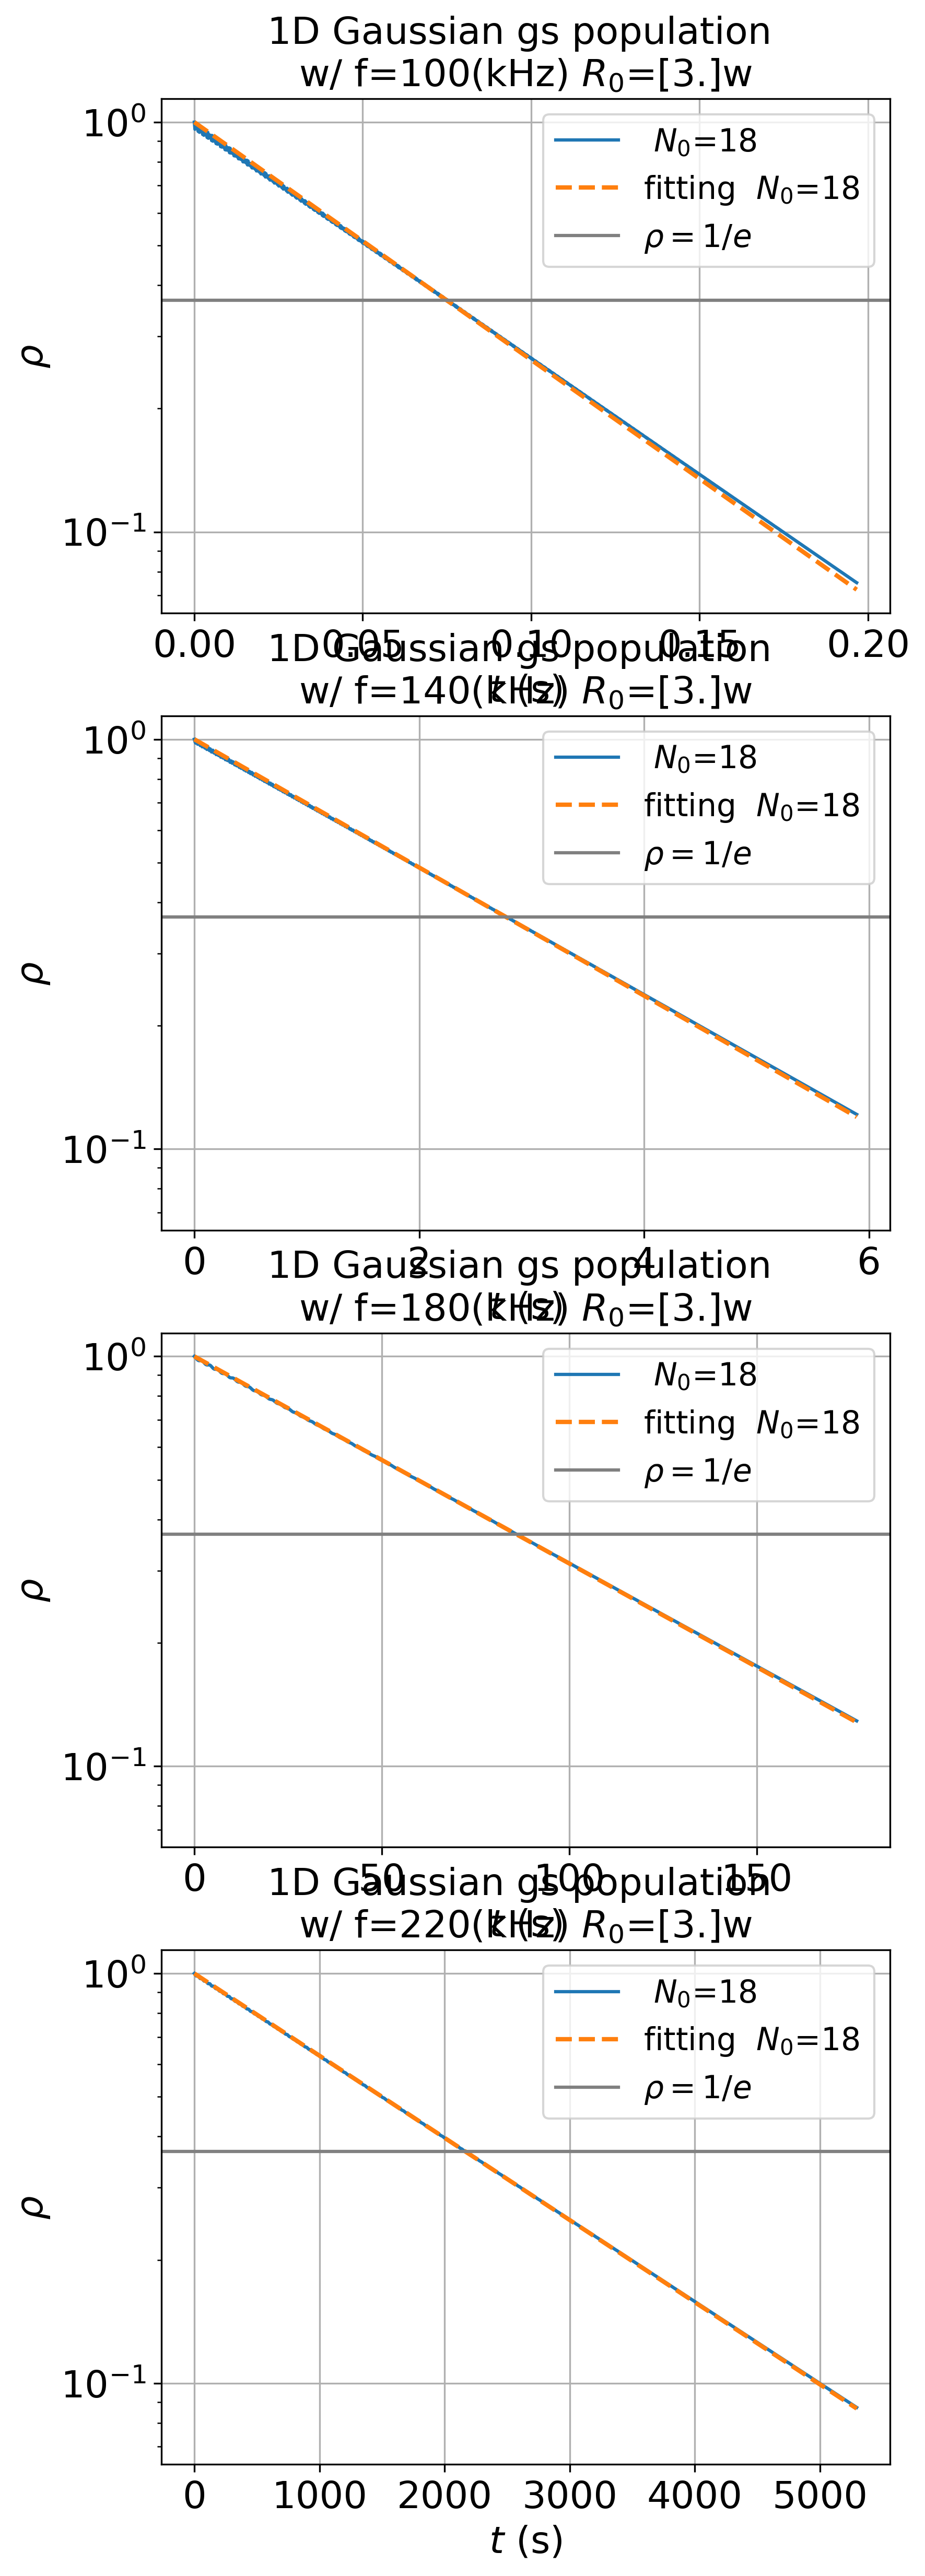

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from DVR_exe import *
import os
from plot_dynamics import *

d = 1
N = 18
N_list = range(N, N + 1, 2)
R = 3 * np.array([1, 1, 2.4])
freq_list = np.arange(100, 250, 40)
an = 0
length = 1
sn = 1000.0
st = get_stop_time(freq_list)

dvr = dynamics(N=N,
               R0=R,
               freq_list=freq_list,
               time=(sn, st),
               dim=d,
               model='Gaussian',
               wavefunc=False,
               realtime=False,
               symmetry=True,
               absorber=True)
DVR_exe(dvr)

os.system('mv -f *.h5 ../output')

fig = None
p = plot(cvg='N',
         quantity='gs',
         N=N,
         R0=R,
         freq_list=freq_list,
         time=(sn, st),
         dim=d,
         model='Gaussian',
         wavefunc=False,
         realtime=False,
         symmetry=True,
         absorber=True)
fig = plot_dynamics(N_list,
                    R0_list=[R for i in range(len(N_list))],
                    dvr=p,
                    fig=fig,
                    length=length,
                    fit=True,
                    avg_no=an)

param_set: model is Gaussian potential.
DVR: dx=[0.17]w is set.
DVR: n=[18] is set.
DVR: R0=[3.]w is set.
DVR: Absorber width LI=1w
DVR: n is set to [24  0  0] by adding absorber.
DVR: R=[4.]w is set.
['x']-reflection symmetry is used.
DVR: dx=[0.17]w is set.
DVR: n=[18] is set.
DVR: R0=[3.]w is set.
DVR: Absorber width LI=1w
DVR: n is set to [24  0  0] by adding absorber.
DVR: R=[4.]w is set.
DVR: dx=[0.17]w is set.
DVR: n=[18] is set.
DVR: R0=[3.]w is set.
DVR: Absorber width LI=1w
DVR: n is set to [24  0  0] by adding absorber.
DVR: R=[4.]w is set.
DVR: dx=[0.17]w is set.
DVR: n=[18] is set.
DVR: R0=[3.]w is set.
DVR: Absorber width LI=1w
DVR: n is set to [24  0  0] by adding absorber.
DVR: R=[4.]w is set.
DVR: dx=[0.17]w is set.
DVR: n=[18] is set.
DVR: R0=[3.]w is set.
DVR: Absorber width LI=1w
DVR: n is set to [24  0  0] by adding absorber.
DVR: R=[4.]w is set.
DVR: dx=[0.17]w is set.
DVR: n=[18] is set.
DVR: R0=[3.]w is set.
DVR: Absorber width LI=1w
DVR: n is set to [24  0  0] 

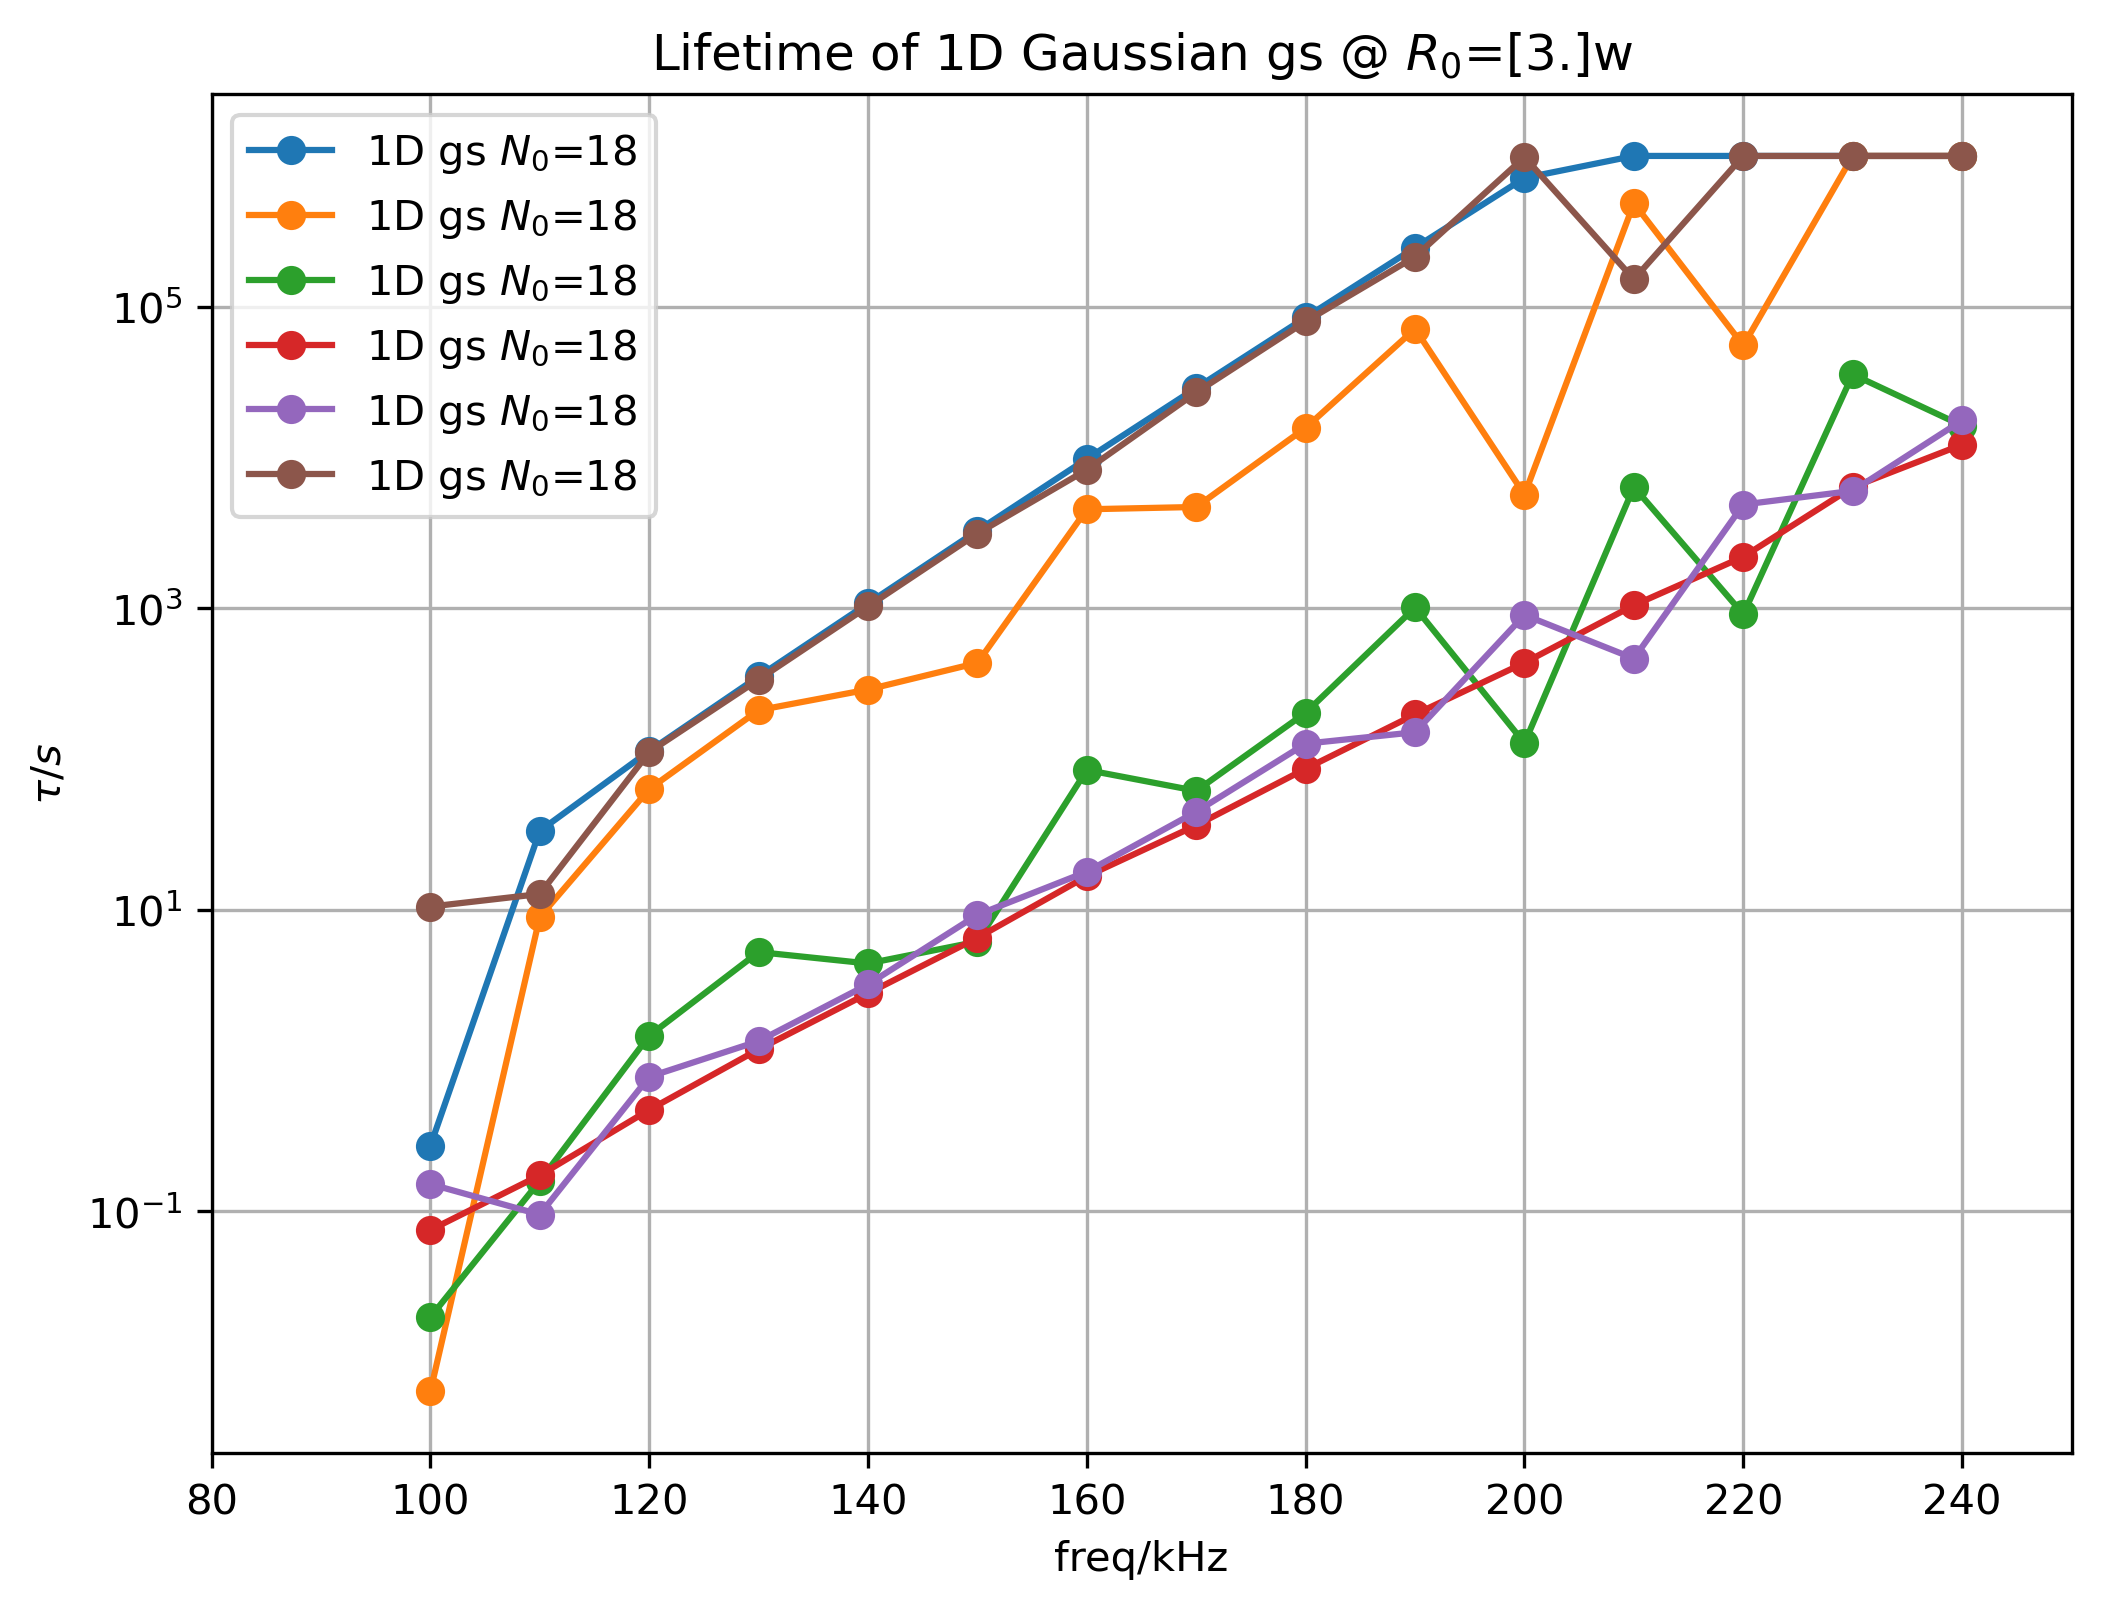

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from DVR_exe import *
import os
from plot_dynamics import *

d = 1
N = 18
N_list = range(N, N + 1, 2)
R = 3 * np.array([1, 1, 2.4])
freq_list = np.arange(100, 250, 10)
an = 0
# t0 = 17.9
t0 = np.inf
L = 1
sn = 1000.0
st = get_stop_time(freq_list, d)
# Gamma_list = np.array([0, 1E-3, .1, .5, 1, 5, 10, 1E3, 1E5]) * 57.04
Gamma_list = np.array([0, 1E-3, .5, 1, 10, 1E5]) * 57.04

# for Vi in Gamma_list:
#     dvr = dynamics(N=N,
#                    R0=R,
#                    freq_list=freq_list,
#                    dim=d,
#                    model='Gaussian',
#                    wavefunc=False,
#                    realtime=False,
#                    symmetry=True,
#                    absorber=True,
#                    ab_param=(Vi, L))
#     DVR_exe(dvr)

# os.system('mv -f *.h5 ../output')
p = plot(cvg='N',
         quantity='gs',
         N=N,
         R0=R,
         freq_list=freq_list,
         dim=d,
         model='Gaussian',
         wavefunc=False,
         realtime=False,
         symmetry=True,
         absorber=True)

fig = None
for i in range(len(Gamma_list)):
    p.VI = Gamma_list[i] * p.kHz_2p / p.V0_SI
    fig = plot_lifetime(N_list,
                        R0_list=[R for i in range(len(N_list))],
                        dvr=p,
                        fig=fig,
                        err=False,
                        avg_no=an,
                        tau=t0)


### Check absorber width

param_set: model is Gaussian potential.
DVR: dx=[0.17]w is set.
DVR: n=[18] is set.
DVR: R0=[3.]w is set.
DVR: Absorber width LI=1w
DVR: n is set to [24  0  0] by adding absorber.
DVR: R=[4.]w is set.
['x']-reflection symmetry is used.
DVR: dx=[0.17]w is set.
DVR: n=[18] is set.
DVR: R0=[3.]w is set.
DVR: Absorber width LI=1w
DVR: n is set to [24  0  0] by adding absorber.
DVR: R=[4.]w is set.
DVR: dx=[0.17]w is set.
DVR: n=[18] is set.
DVR: R0=[3.]w is set.
DVR: Absorber width LI=1w
DVR: n is set to [24  0  0] by adding absorber.
DVR: R=[4.]w is set.
DVR: dx=[0.17]w is set.
DVR: n=[18] is set.
DVR: R0=[3.]w is set.
DVR: Absorber width LI=1w
DVR: n is set to [24  0  0] by adding absorber.
DVR: R=[4.]w is set.
DVR: dx=[0.17]w is set.
DVR: n=[18] is set.
DVR: R0=[3.]w is set.
DVR: Absorber width LI=1w
DVR: n is set to [24  0  0] by adding absorber.
DVR: R=[4.]w is set.
DVR: dx=[0.17]w is set.
DVR: n=[18] is set.
DVR: R0=[3.]w is set.
DVR: Absorber width LI=1w
DVR: n is set to [24  0  0] 

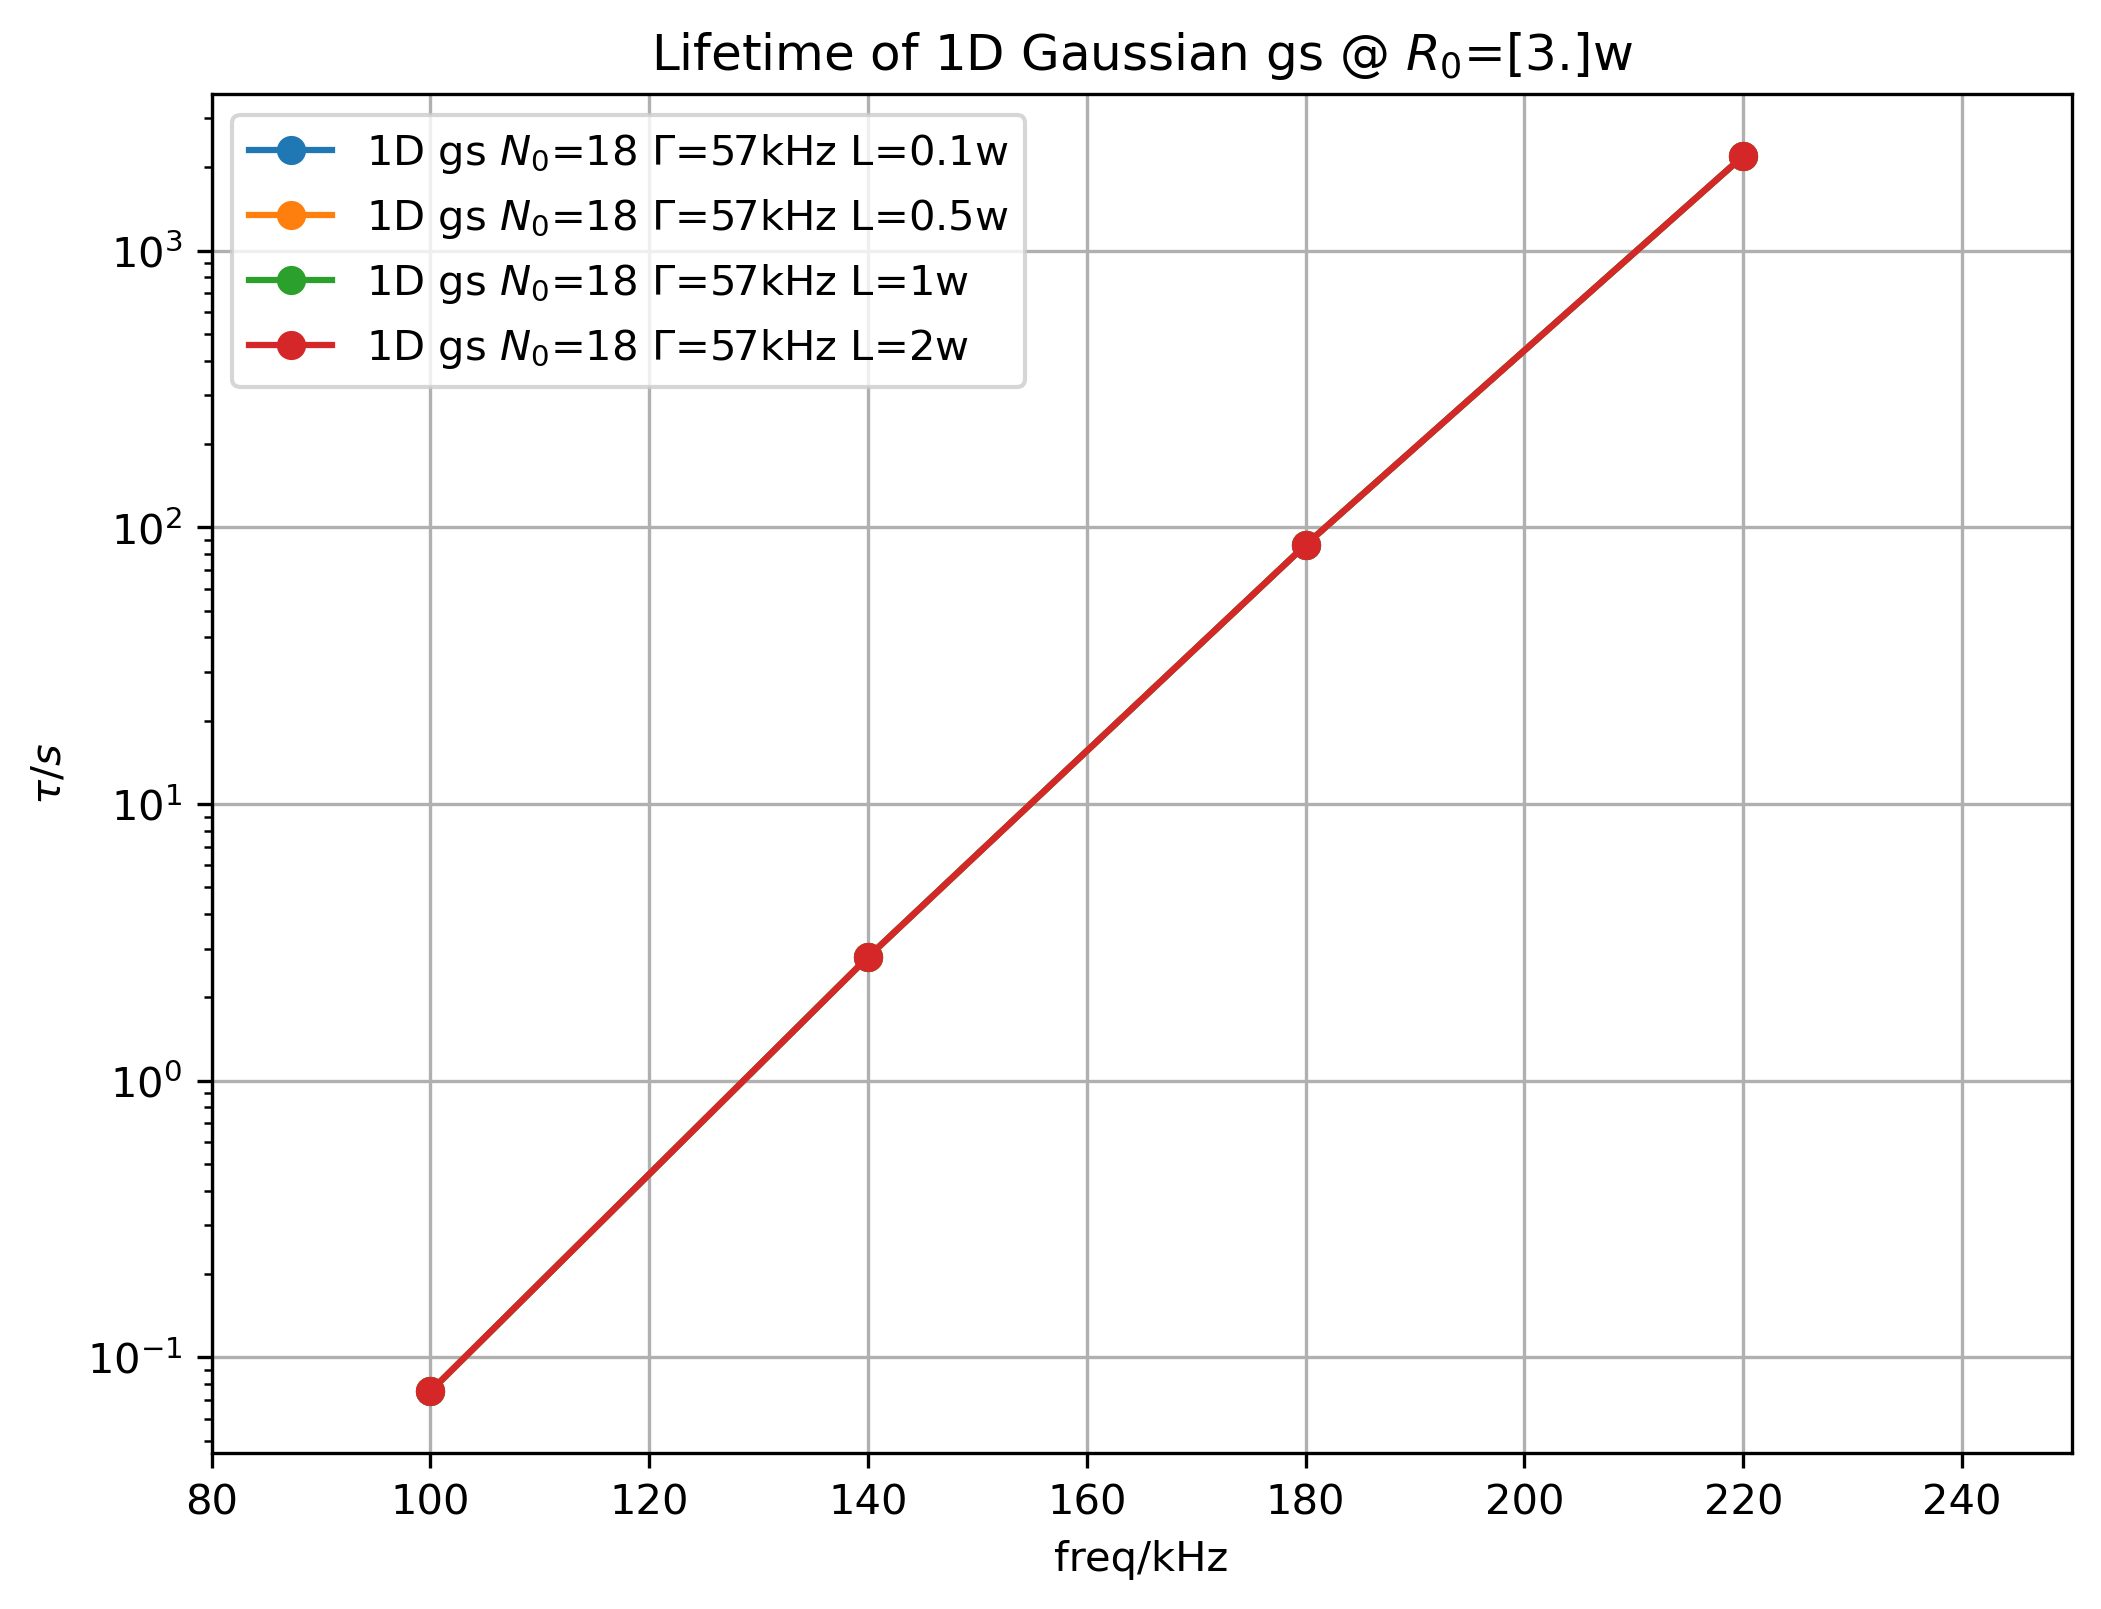

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from DVR_exe import *
import os
from plot_dynamics import *

d = 1
N = 18
N_list = range(N, N + 1, 2)
R = 3 * np.array([1, 1, 2.4])
freq_list = np.arange(100, 250, 40)
an = 0
# t0 = 17.9
t0 = np.inf
# L = 1
Vi = 57.4
sn = 1000.0
st = get_stop_time(freq_list, d)
L_list = np.array([.1, .5, 1, 2])

# for L in L_list:
#     dvr = dynamics(N=N,
#                    R0=R,
#                    freq_list=freq_list,
#                    dim=d,
#                    model='Gaussian',
#                    wavefunc=False,
#                    realtime=False,
#                    symmetry=True,
#                    absorber=True,
#                    ab_param=(Vi, L))
#     DVR_exe(dvr)

# os.system('mv -f *.h5 ../output')
p = plot(cvg='N',
         quantity='gs',
         N=N,
         R0=R,
         freq_list=freq_list,
         dim=d,
         model='Gaussian',
         wavefunc=False,
         realtime=False,
         symmetry=True,
         absorber=True)

fig = None
for i in range(len(L_list)):
    p.L = L_list[i]
    fig = plot_lifetime(N_list,
                        R0_list=[R for i in range(len(N_list))],
                        dvr=p,
                        fig=fig,
                        err=False,
                        avg_no=an,
                        tau=t0)


### Check stop time

param_set: model is Gaussian potential.
DVR: dx=[0.17]w is set.
DVR: n=[18] is set.
DVR: R0=[3.]w is set.
DVR: Absorber width LI=1w
DVR: n is set to [24  0  0] by adding absorber.
DVR: R=[4.]w is set.
['x']-reflection symmetry is used.
Dynamic time step=3.5023e-06 is too small compared to driving period 1e-05. Set time step to driving period.
DVR: dx=[0.17]w is set.
DVR: n=[18] is set.
DVR: R0=[3.]w is set.
DVR: Absorber width LI=1w
DVR: n is set to [24  0  0] by adding absorber.
DVR: R=[4.]w is set.
DVR: dx=[0.17]w is set.
DVR: n=[18] is set.
DVR: R0=[3.]w is set.
DVR: Absorber width LI=1w
DVR: n is set to [24  0  0] by adding absorber.
DVR: R=[4.]w is set.
DVR: dx=[0.17]w is set.
DVR: n=[18] is set.
DVR: R0=[3.]w is set.
DVR: Absorber width LI=1w
DVR: n is set to [24  0  0] by adding absorber.
DVR: R=[4.]w is set.
DVR: dx=[0.17]w is set.
DVR: n=[18] is set.
DVR: R0=[3.]w is set.
DVR: Absorber width LI=1w
DVR: n is set to [24  0  0] by adding absorber.
DVR: R=[4.]w is set.
DVR: dx=[0.

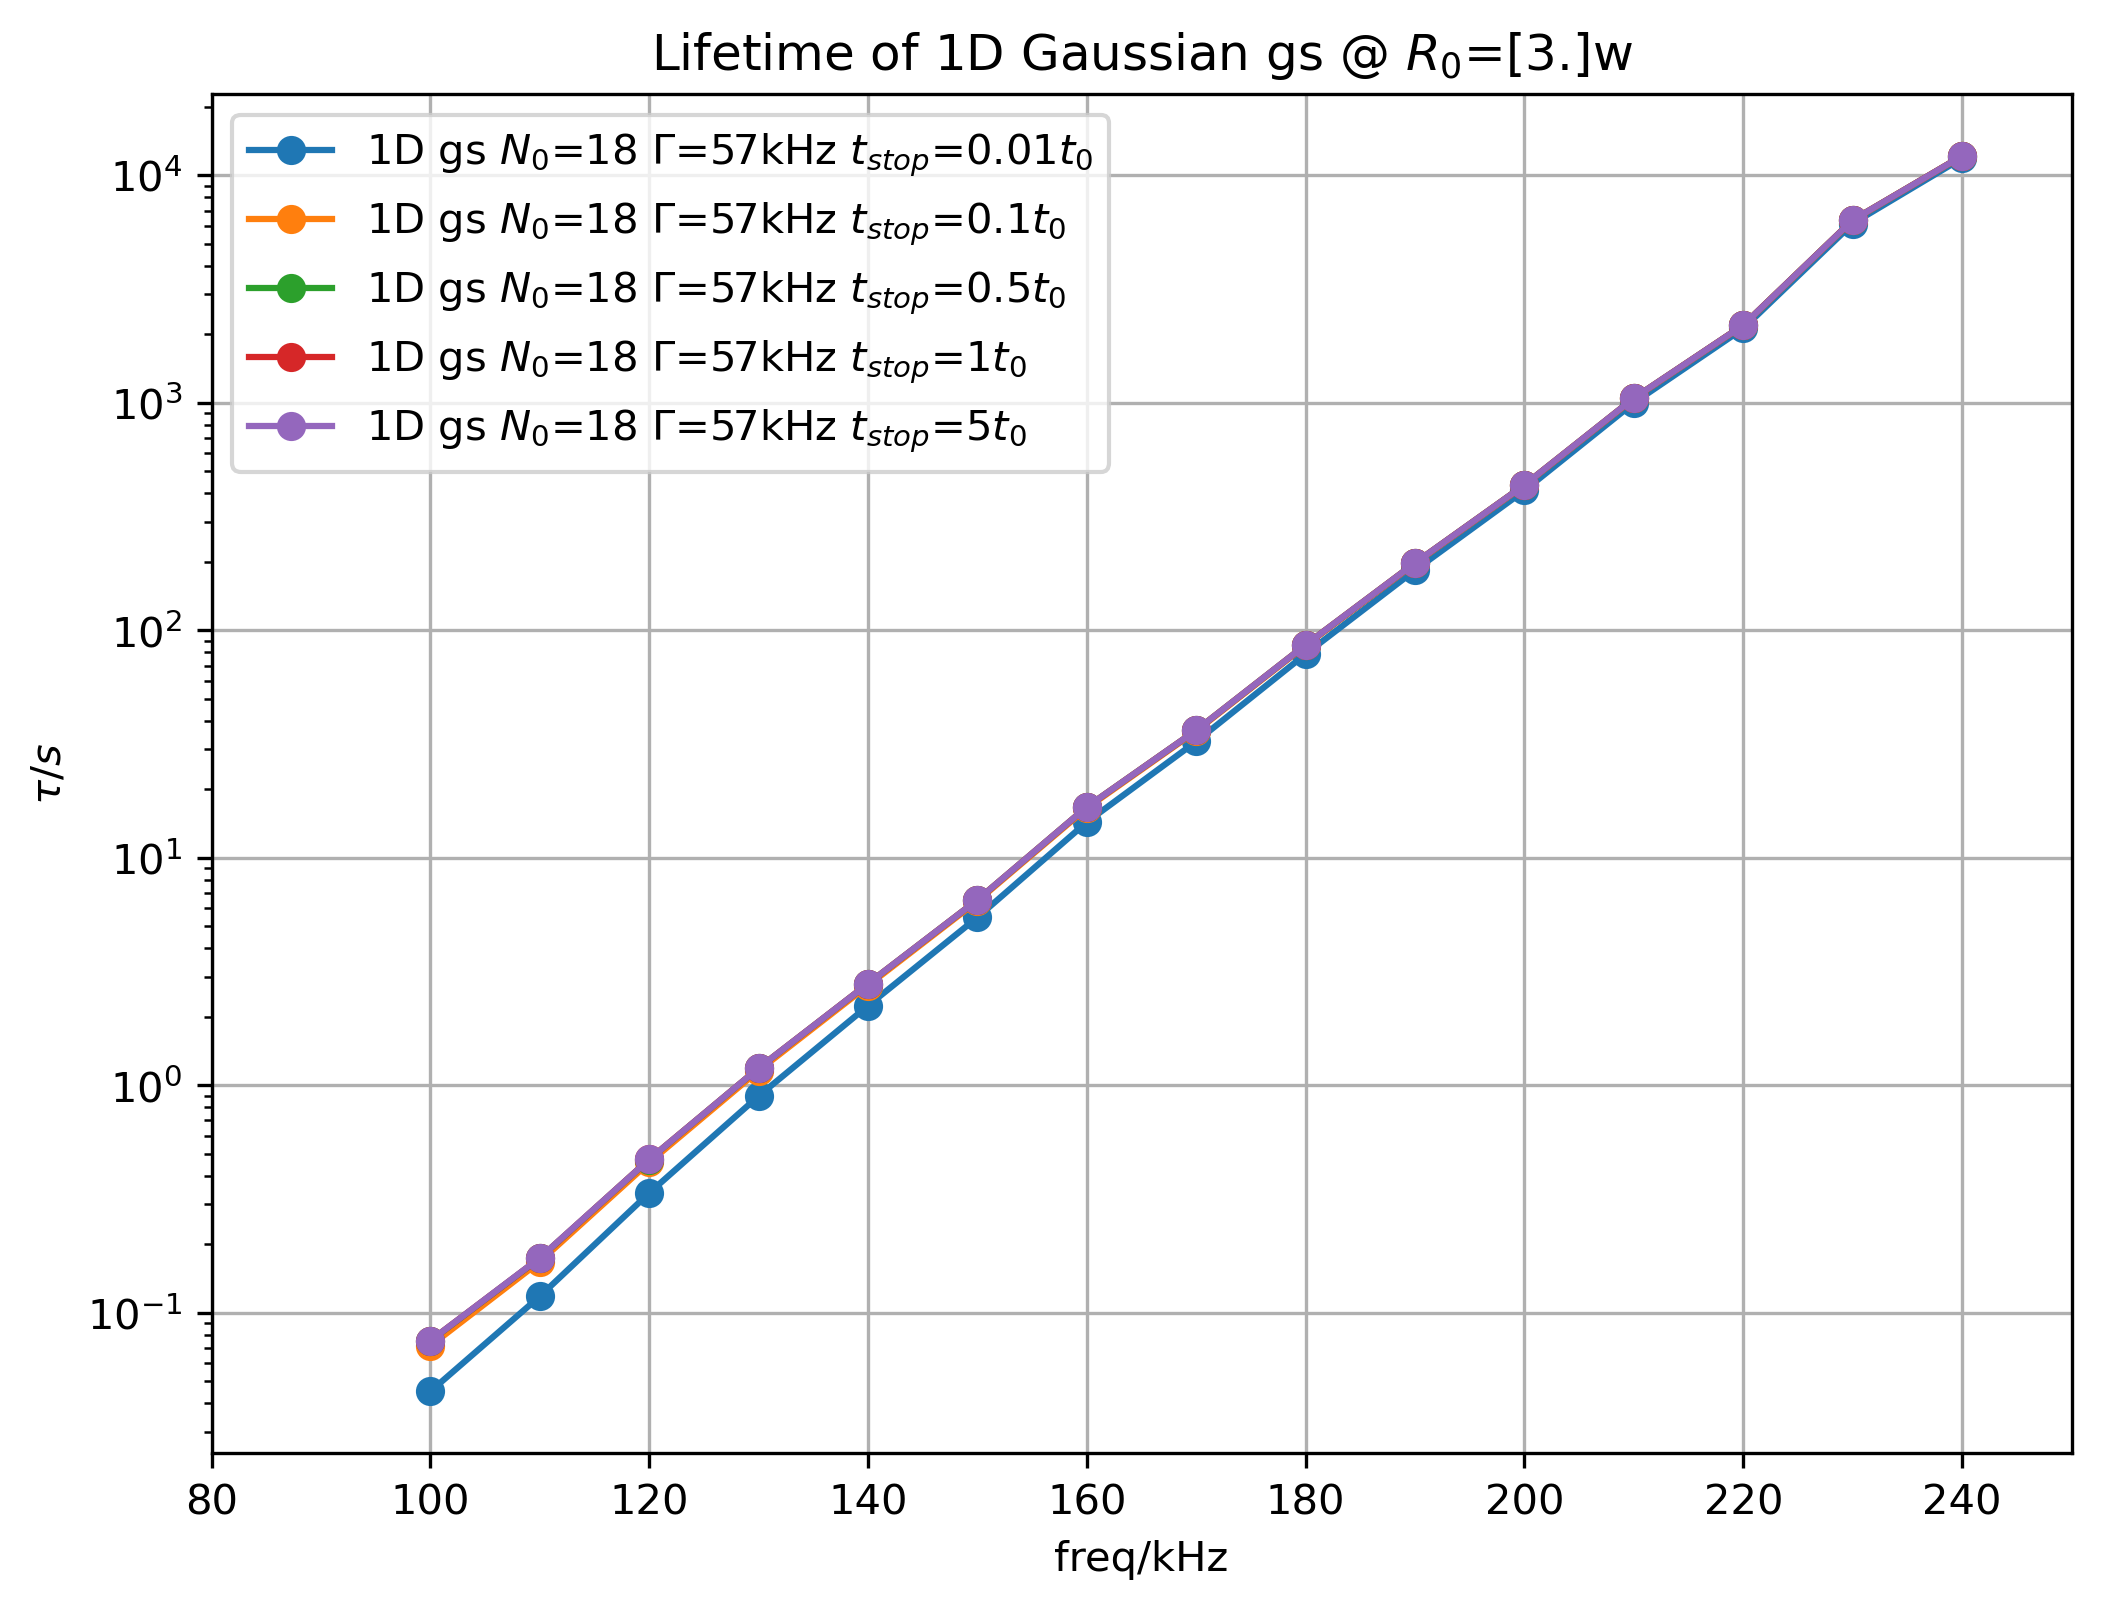

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from DVR_exe import *
import os
from plot_dynamics import *

d = 1
N = 18
N_list = range(N, N + 1, 2)
R = 3 * np.array([1, 1, 2.4])
freq_list = np.arange(100, 250, 10)
an = 0
# t0 = 17.9
t0 = np.inf
L = 1
sn = 1000.0
st = get_stop_time(freq_list)
st_list = [i * st for i in np.array([1E-2, .1, .5, 1, 5])]
gamma = 57.04

# for i in range(len(st_list)):
#     dvr = dynamics(N=N,
#                    R0=R,
#                    freq_list=freq_list,
#                    time=(sn, st_list[i]),
#                    dim=d,
#                    model='Gaussian',
#                    wavefunc=False,
#                    realtime=False,
#                    symmetry=True,
#                    ab_param=(gamma, L),
#                    absorber=True)
#     DVR_exe(dvr)

# os.system('mv -f *.h5 ../output')

st_list = [i * st for i in np.array([1E-2, .1, .5, 1, 5])]
fig = None
for i in range(len(st_list)):
    p = plot(cvg='N',
             quantity='gs',
             N=N,
             R0=R,
             freq_list=freq_list,
             dim=d,
             time=(sn, st_list[i]),
             model='Gaussian',
             wavefunc=False,
             realtime=False,
             symmetry=True,
             ab_param=(gamma, L),
             absorber=True)
    fig = plot_lifetime(N_list,
                        R0_list=[R for i in range(len(N_list))],
                        dvr=p,
                        fig=fig,
                        err=False,
                        avg_no=an,
                        tau=t0)


param_set: model is Gaussian potential.
DVR: dx=[0.17 0.   0.  ]w is set.
DVR: n=[18  0  0] is set.
DVR: R0=[3.  3.  7.2]w is set.
DVR: Absorber width LI=1w
DVR: n is set to [24  0  0] by adding absorber.
DVR: R=[4.  3.  7.2]w is set.
['x']-reflection symmetry is used.
Dynamic time step=3.5023e-06 is too small compared to driving period 1e-05. Set time step to driving period.
DVR: dx=[0.17 0.   0.  ]w is set.
DVR: n=[18  0  0] is set.
DVR: R0=[3.  3.  7.2]w is set.
DVR: Absorber width LI=1w
DVR: n is set to [24  0  0] by adding absorber.
DVR: R=[4. 0. 0.]w is set.
DVR: dx=[0.17 0.   0.  ]w is set.
DVR: n=[18  0  0] is set.
DVR: R0=[3.  3.  7.2]w is set.
DVR: Absorber width LI=1w
DVR: n is set to [24  0  0] by adding absorber.
DVR: R=[4. 0. 0.]w is set.
DVR: dx=[0.17 0.   0.  ]w is set.
DVR: n=[18  0  0] is set.
DVR: R0=[3.  3.  7.2]w is set.
DVR: Absorber width LI=1w
DVR: n is set to [24  0  0] by adding absorber.
DVR: R=[4. 0. 0.]w is set.
DVR: dx=[0.17 0.   0.  ]w is set.
DVR: n=[18 

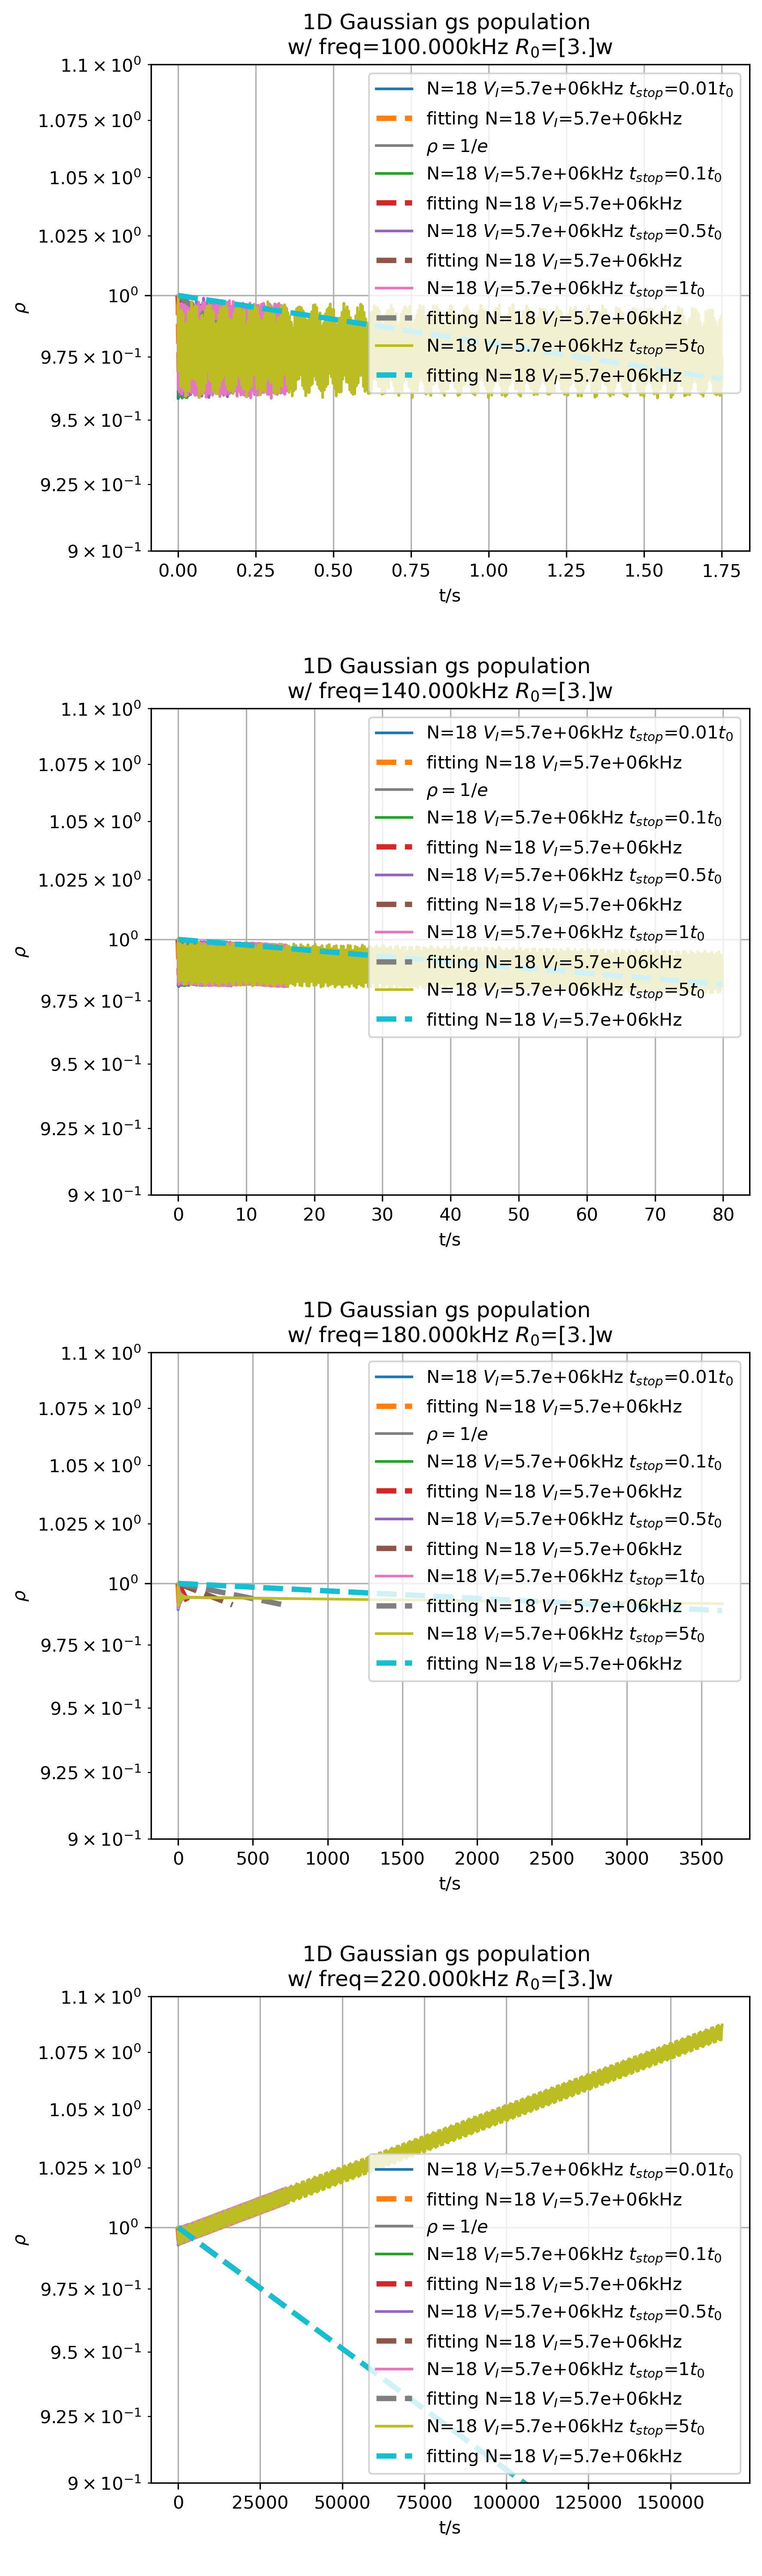

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from DVR_exe import *
import os
from plot_dynamics import *

d = 1
N = 18
N_list = range(N, N + 1, 2)
R = 3 * np.array([1, 1, 2.4])
freq_list = np.arange(100, 250, 40)
an = 0
# t0 = 17.9
t0 = np.inf
L = 1
Ns = 10
sn = 1000.0
st = get_stop_time(freq_list)
st_list = [i * st for i in np.array([1E-2, .1, .5, 1, 5])]
gamma = 57.04 * 1E5

ax = None
for i in range(len(st_list)):
    p = plot(cvg='N',
             quantity='gs',
             N=N,
             R0=R,
             freq_list=freq_list,
             dim=d,
             time=(sn, st_list[i]),
             model='Gaussian',
             wavefunc=False,
             realtime=False,
             symmetry=True,
             ab_param=(gamma, L),
             absorber=True)
    ax = plot_dynamics(N_list,
                       R0_list=[R for i in range(len(N_list))],
                       dvr=p,
                       ax=ax,
                       avg_no=an,
                       fit=True)

Stop time has no effect on the fitted lifetime!

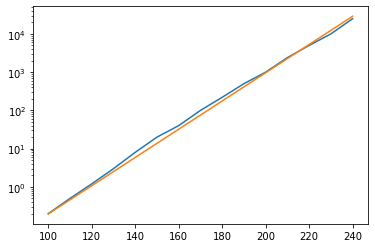

In [19]:
import numpy as np
import matplotlib.pyplot as plt

a = np.array(
    [.2, .5, 1.2, 3, 8, 20, 40, 100, 220, 500, 1000, 2400, 5000, 10000, 25000])
freq_list = np.arange(100, 250, 10)
c = 4E-5 * np.exp(freq_list * 0.085)
plt.semilogy(freq_list, a)
plt.semilogy(freq_list, c)

## Check smooth strobe

/Users/nottforestfc/Library/CloudStorage/OneDrive-RiceUniversity/Documents/Research/Optical tweezer on Fermi Hubbard/src/dynamics.py:145: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if t is 0:


param_set: model is Gaussian potential.
DVR: dx=[0.16666667]w is set.
DVR: n=[18] is set.
DVR: R0=[3.]w is set.
DVR: Absorber width LI=1w
DVR: n is set to [24] by adding absorber.
DVR: R=[4.]w is set.
['x']-reflection symmetry is used.
param_set: trap parameter V0=104.52kHz w=1000nm
1D N=18 R0=[3.]w
freq=[100 140 180 220]kHz
Gaussian potential starts.
n=[24], dx=[0.17]w, p=[1], model=Gaussian,
t=[   0.2     5.89  176.51 5288.92],
t_step=[0.   0.01 0.18 5.29]
starts.
Matrix size= 25
Estimated full matrix memory usage, float: 0.00 MiB, complex: 0.01 MiB
Parameter setting time: 0.00s.

init_state: initial state of T+0.5V is calculated.
H_mat: n=[24] dx=[0.17]w p=[1] Gaussian starts.
H_mat: H matrix memory usage: 0.00 MiB.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.00s.
H_solver: eigenstates memory usage: 0.00 MiB.
Initial state preparation finished. Time spent: 0.00s.

H_mat: n=[24] dx=[0.17]w p=[1] Gaussian starts.
H_mat: H matrix memory usage: 0.01 MiB.
H_solver: Gaussian Hami

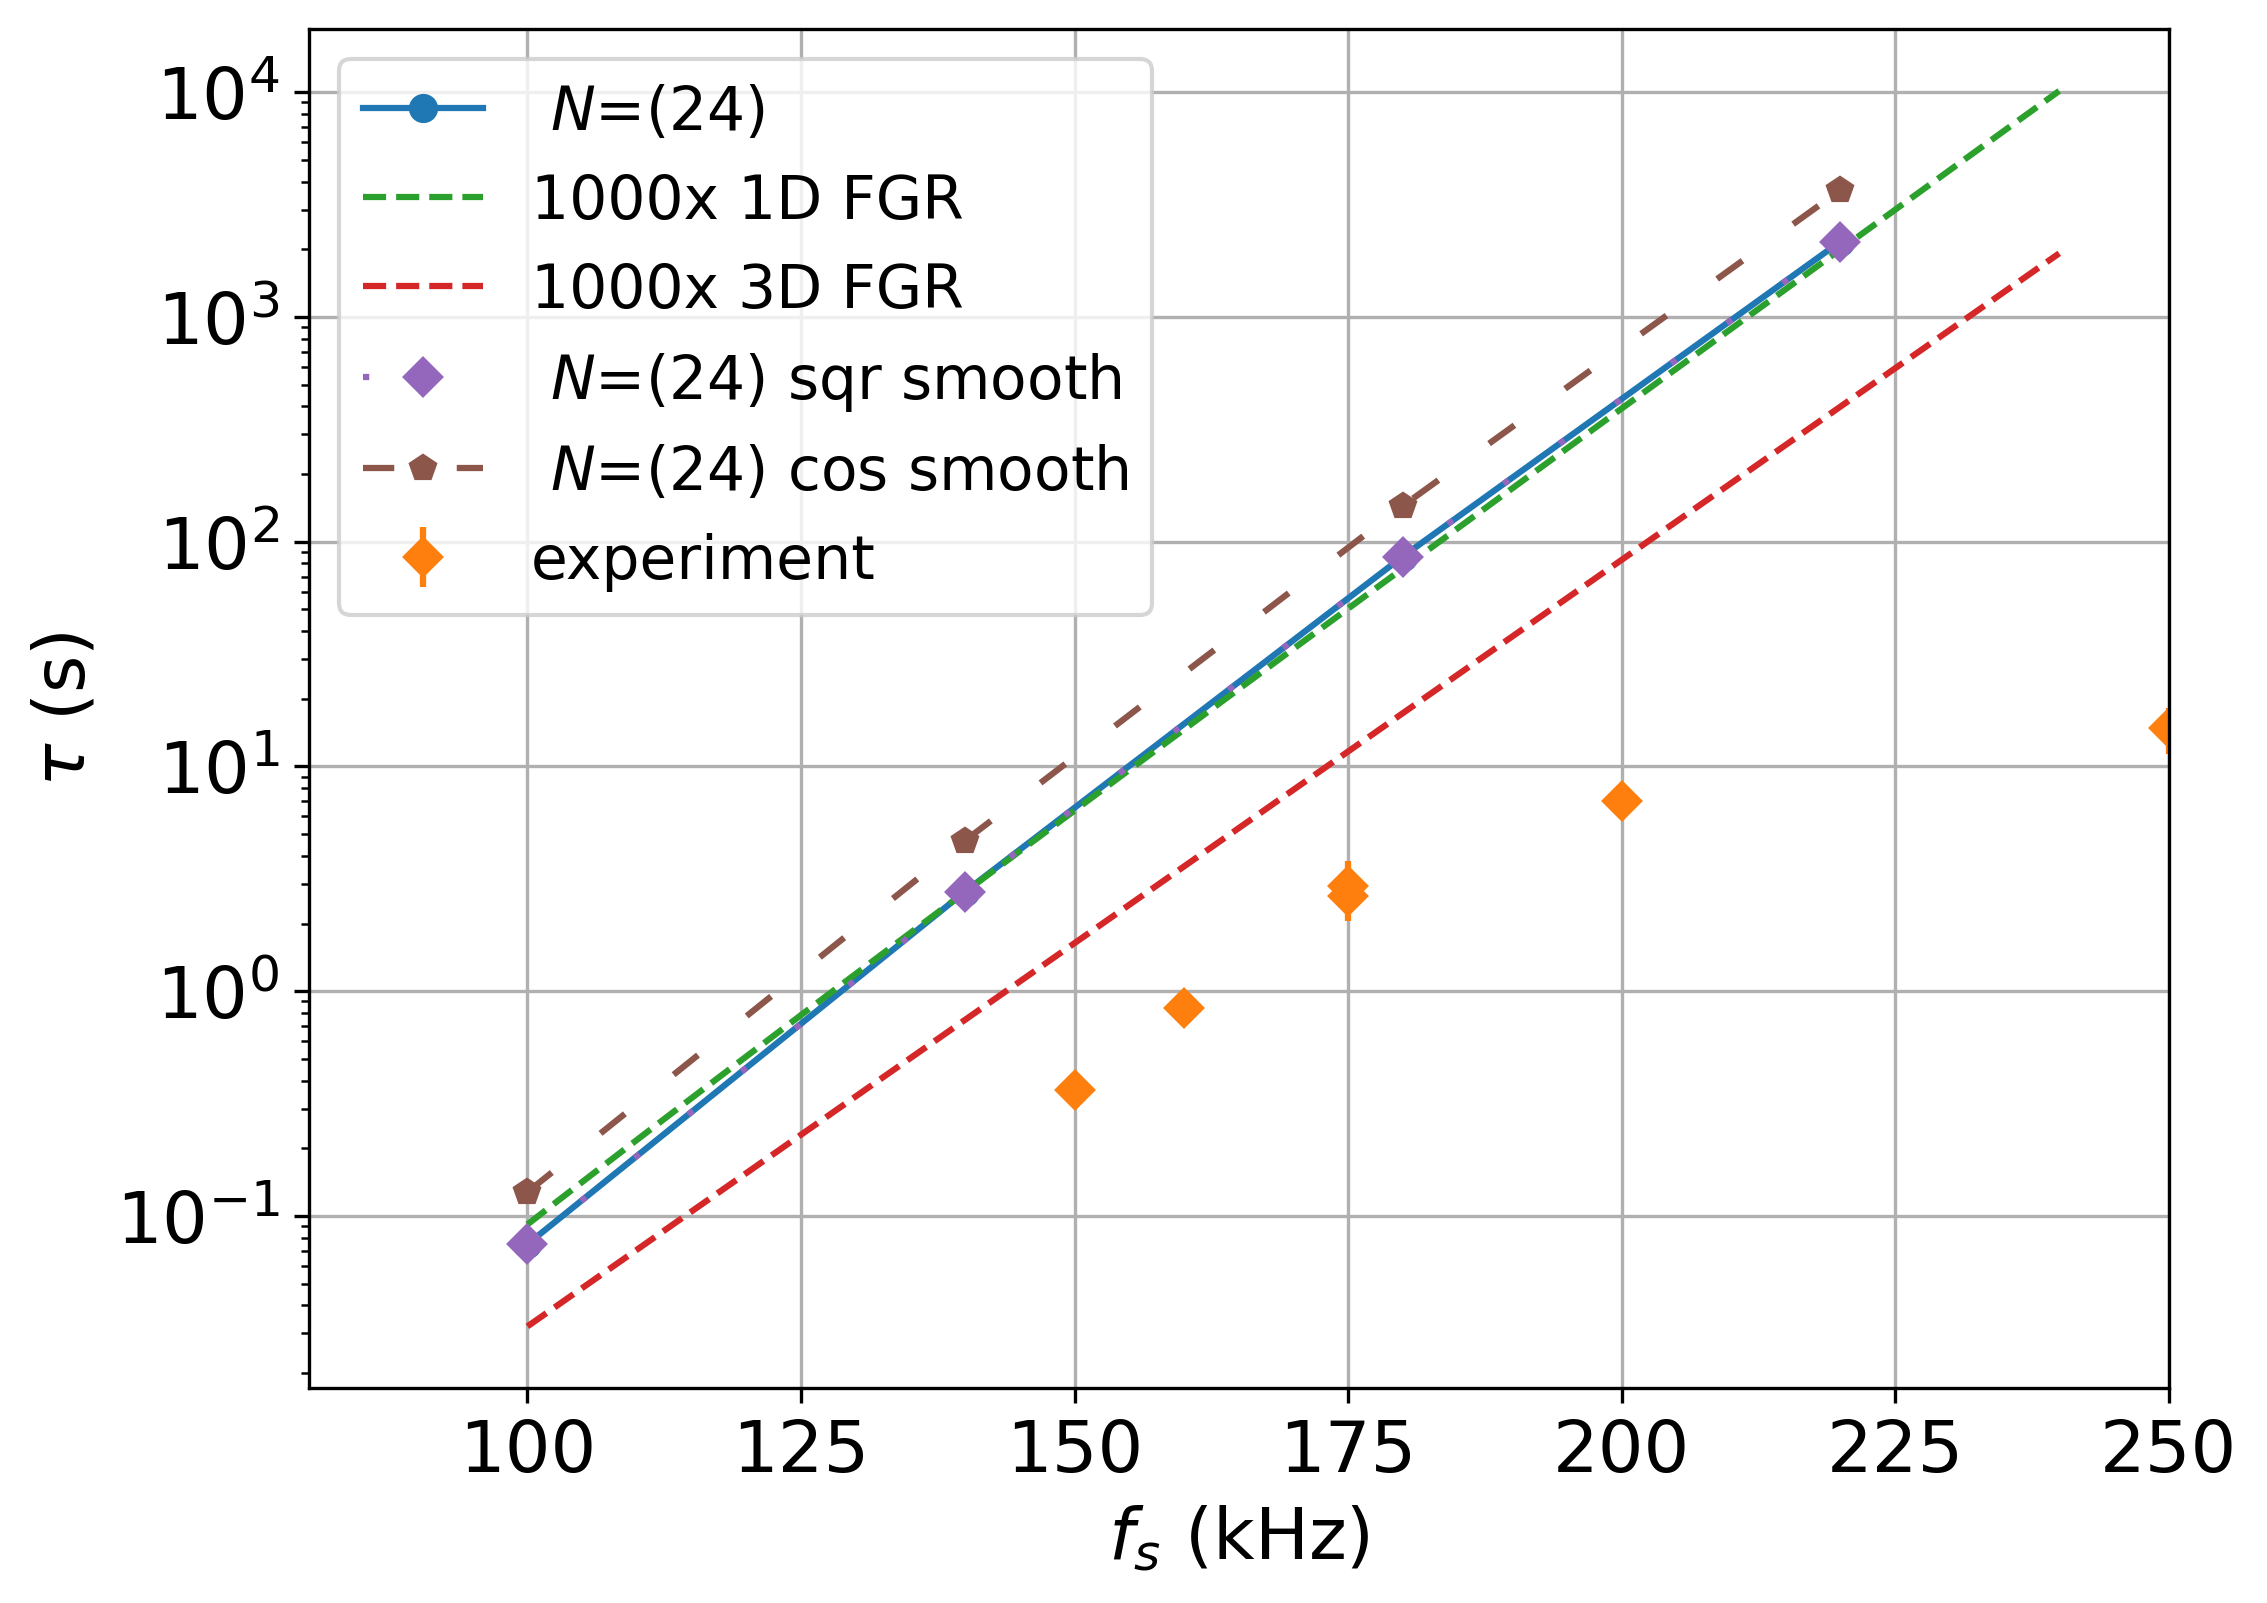

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from DVR_exe import *
import os
from plot_dynamics import *

d = 1
N = 18
N_list = range(N, N + 1, 2)
R = 3 * np.array([1, 1, 2.4])
freq_list = np.arange(100, 250, 40)
an = 0
# t0 = 17.9
t0 = np.inf
Ns = 20
sn = 1000.0
st = get_stop_time(freq_list)
t0_list = [-1, 0, 1]

# for i in range(len(t0_list)):
#     dvr = dynamics(N=N,
#                    R0=R,
#                    freq_list=freq_list,
#                    time=(sn, st),
#                    dim=d,
#                    smooth=(t0_list[i], Ns),
#                    model='Gaussian',
#                    wavefunc=False,
#                    realtime=False,
#                    symmetry=True,
#                    absorber=True)
#     DVR_exe(dvr)

# os.system('mv -f *.h5 ../output')

# t0_list = [-1, 0, 1]
fig = None
for i in range(len(t0_list)):
    p = plot(cvg='N',
             quantity='gs',
             N=N,
             R0=R,
             freq_list=freq_list,
             time=(sn, st),
             dim=d,
             smooth=(t0_list[i], Ns),
             model='Gaussian',
             wavefunc=False,
             realtime=False,
             symmetry=True,
             absorber=True)
    fig = plot_lifetime(N_list,
                        R0_list=[R for i in range(len(N_list))],
                        dvr=p,
                        fig=fig,
                        err=False,
                        avg_no=an,
                        show_fgr=True,
                        tau=t0)


param_set: model is Gaussian potential.
DVR: dx=[0.17 0.   0.  ]w is set.
DVR: n=[18  0  0] is set.
DVR: R0=[3.  3.  7.2]w is set.
DVR: Absorber width LI=1w
DVR: n is set to [24  0  0] by adding absorber.
DVR: R=[4.  3.  7.2]w is set.
['x']-reflection symmetry is used.
DVR: dx=[0.17 0.   0.  ]w is set.
DVR: n=[18  0  0] is set.
DVR: R0=[3.  3.  7.2]w is set.
DVR: Absorber width LI=1w
DVR: n is set to [24  0  0] by adding absorber.
DVR: R=[4. 0. 0.]w is set.
DVR: dx=[0.17 0.   0.  ]w is set.
DVR: n=[18  0  0] is set.
DVR: R0=[3.  3.  7.2]w is set.
DVR: Absorber width LI=1w
DVR: n is set to [24  0  0] by adding absorber.
DVR: R=[4. 0. 0.]w is set.
DVR: dx=[0.17 0.   0.  ]w is set.
DVR: n=[18  0  0] is set.
DVR: R0=[3.  3.  7.2]w is set.
DVR: Absorber width LI=1w
DVR: n is set to [24  0  0] by adding absorber.
DVR: R=[4. 0. 0.]w is set.
DVR: dx=[0.17 0.   0.  ]w is set.
DVR: n=[18  0  0] is set.
DVR: R0=[3.  3.  7.2]w is set.
DVR: Absorber width LI=1w
DVR: n is set to [24  0  0] by adding

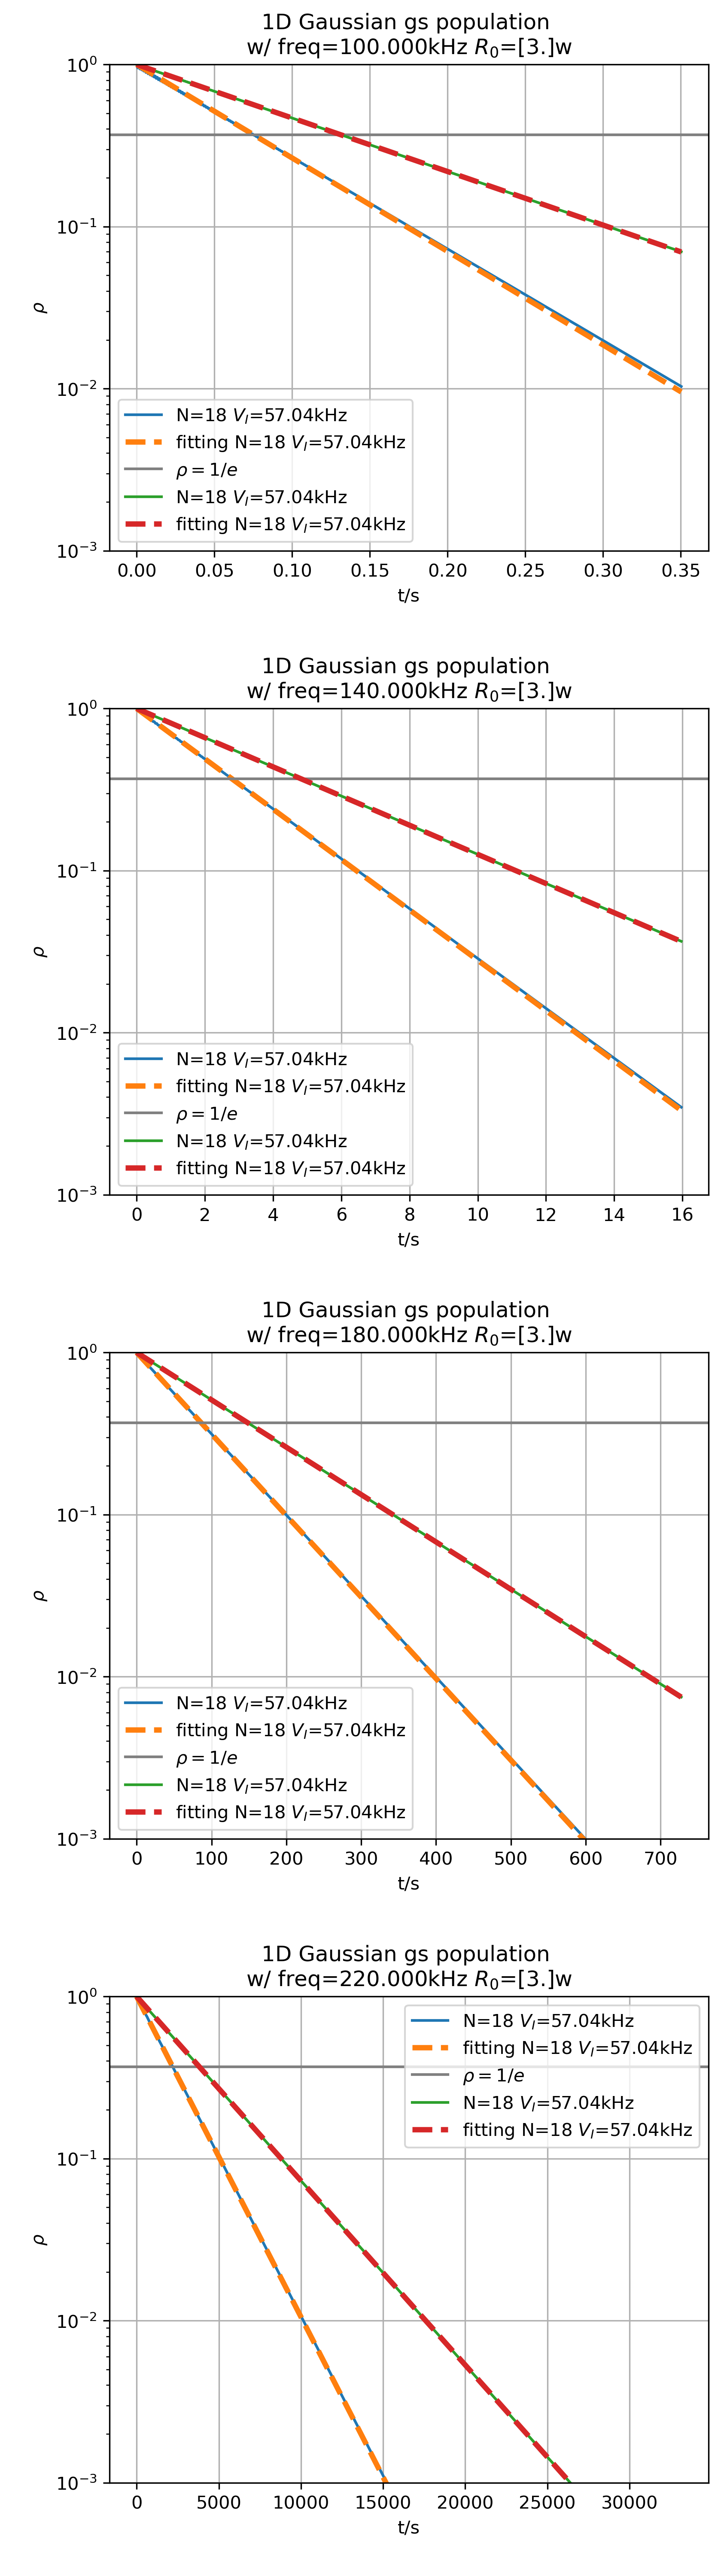

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from DVR_exe import *
import os
from plot_dynamics import *

d = 1
N = 18
N_list = range(N, N + 1, 2)
R = 3 * np.array([1, 1, 2.4])
freq_list = np.arange(100, 250, 40)
an = 0
# t0 = 17.9
t0 = np.inf
L = 1
Ns = 10
sn = 1000.0
st = get_stop_time(freq_list)
t0_list = [0, 1]

# for i in range(len(t0_list)):
#     dvr = dynamics(N=N,
#                    R0=R,
#                    freq_list=freq_list,
#                    time=(sn, st),
#                    dim=d,
#                    smooth=(t0_list[i], Ns),
#                    model='Gaussian',
#                    wavefunc=False,
#                    realtime=False,
#                    symmetry=True,
#                    absorber=True)
#     DVR_exe(dvr)

# os.system('mv *.h5 ../output')

ax = None
for i in range(len(t0_list)):
    p = plot(cvg='N',
             quantity='gs',
             N=N,
             R0=R,
             freq_list=freq_list,
             time=(sn, st),
             dim=d,
             smooth=(t0_list[i], Ns),
             model='Gaussian',
             wavefunc=False,
             realtime=False,
             symmetry=True,
             absorber=True)
    ax = plot_dynamics(N_list,
                       R0_list=[R for i in range(len(N_list))],
                       dvr=p,
                       ax=ax,
                       avg_no=an,
                       fit=True)


In [25]:
from typing import Iterable
import numpy as np

a = 8646
print(isinstance(a, Iterable))
a = '8646'
print(isinstance(a, Iterable))
a = [199]
print(isinstance(a, Iterable))
a = np.array([1241])
print(isinstance(a, Iterable))
a = tuple(a)
print(isinstance(a, Iterable))


False
True
True
True
True


## Check absorption effect on wavefunction dynamics

1D N=18 R0=[4.  4.  8.2]w
freq=[0.12 0.16 0.2 ]V_0\hbar
Gaussian potential starts.
param_set: model is Gaussian/tweezer potential.
['x']-reflection symmetry is used.
n=[18  0  0], dx=[0.22 0.   0.  ]w, p=[1 0 0], model=Gaussian,
t=[0. 0. 0.],
t_step=[0. 0. 0.]
starts.
Matrix size= 19
Estimated full matrix memory usage, float: 0.00 MiB, complex: 0.01 MiB
Parameter setting time: 0.00s.

H_mat: n=[18  0  0] dx=[0.22 0.   0.  ]w p=[1 0 0] Gaussian starts.
H_mat: H matrix memory usage: 0.00 MiB.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.00s.
H_solver: eigenstates memory usage: 0.00 MiB.
Initial state preparation finished. Time spent: 0.00s.

H_mat: n=[18  0  0] dx=[0.22 0.   0.  ]w p=[1 0 0] Gaussian starts.
H_mat: H matrix memory usage: 0.01 MiB.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.00s.
H_solver: eigenstates memory usage: 0.01 MiB.
H_mat: n=[18  0  0] dx=[0.22 0.   0.  ]w p=[1 0 0] Gaussian starts.
H_mat: H matrix memory usage: 0.01 MiB.
H_solver: free particle 

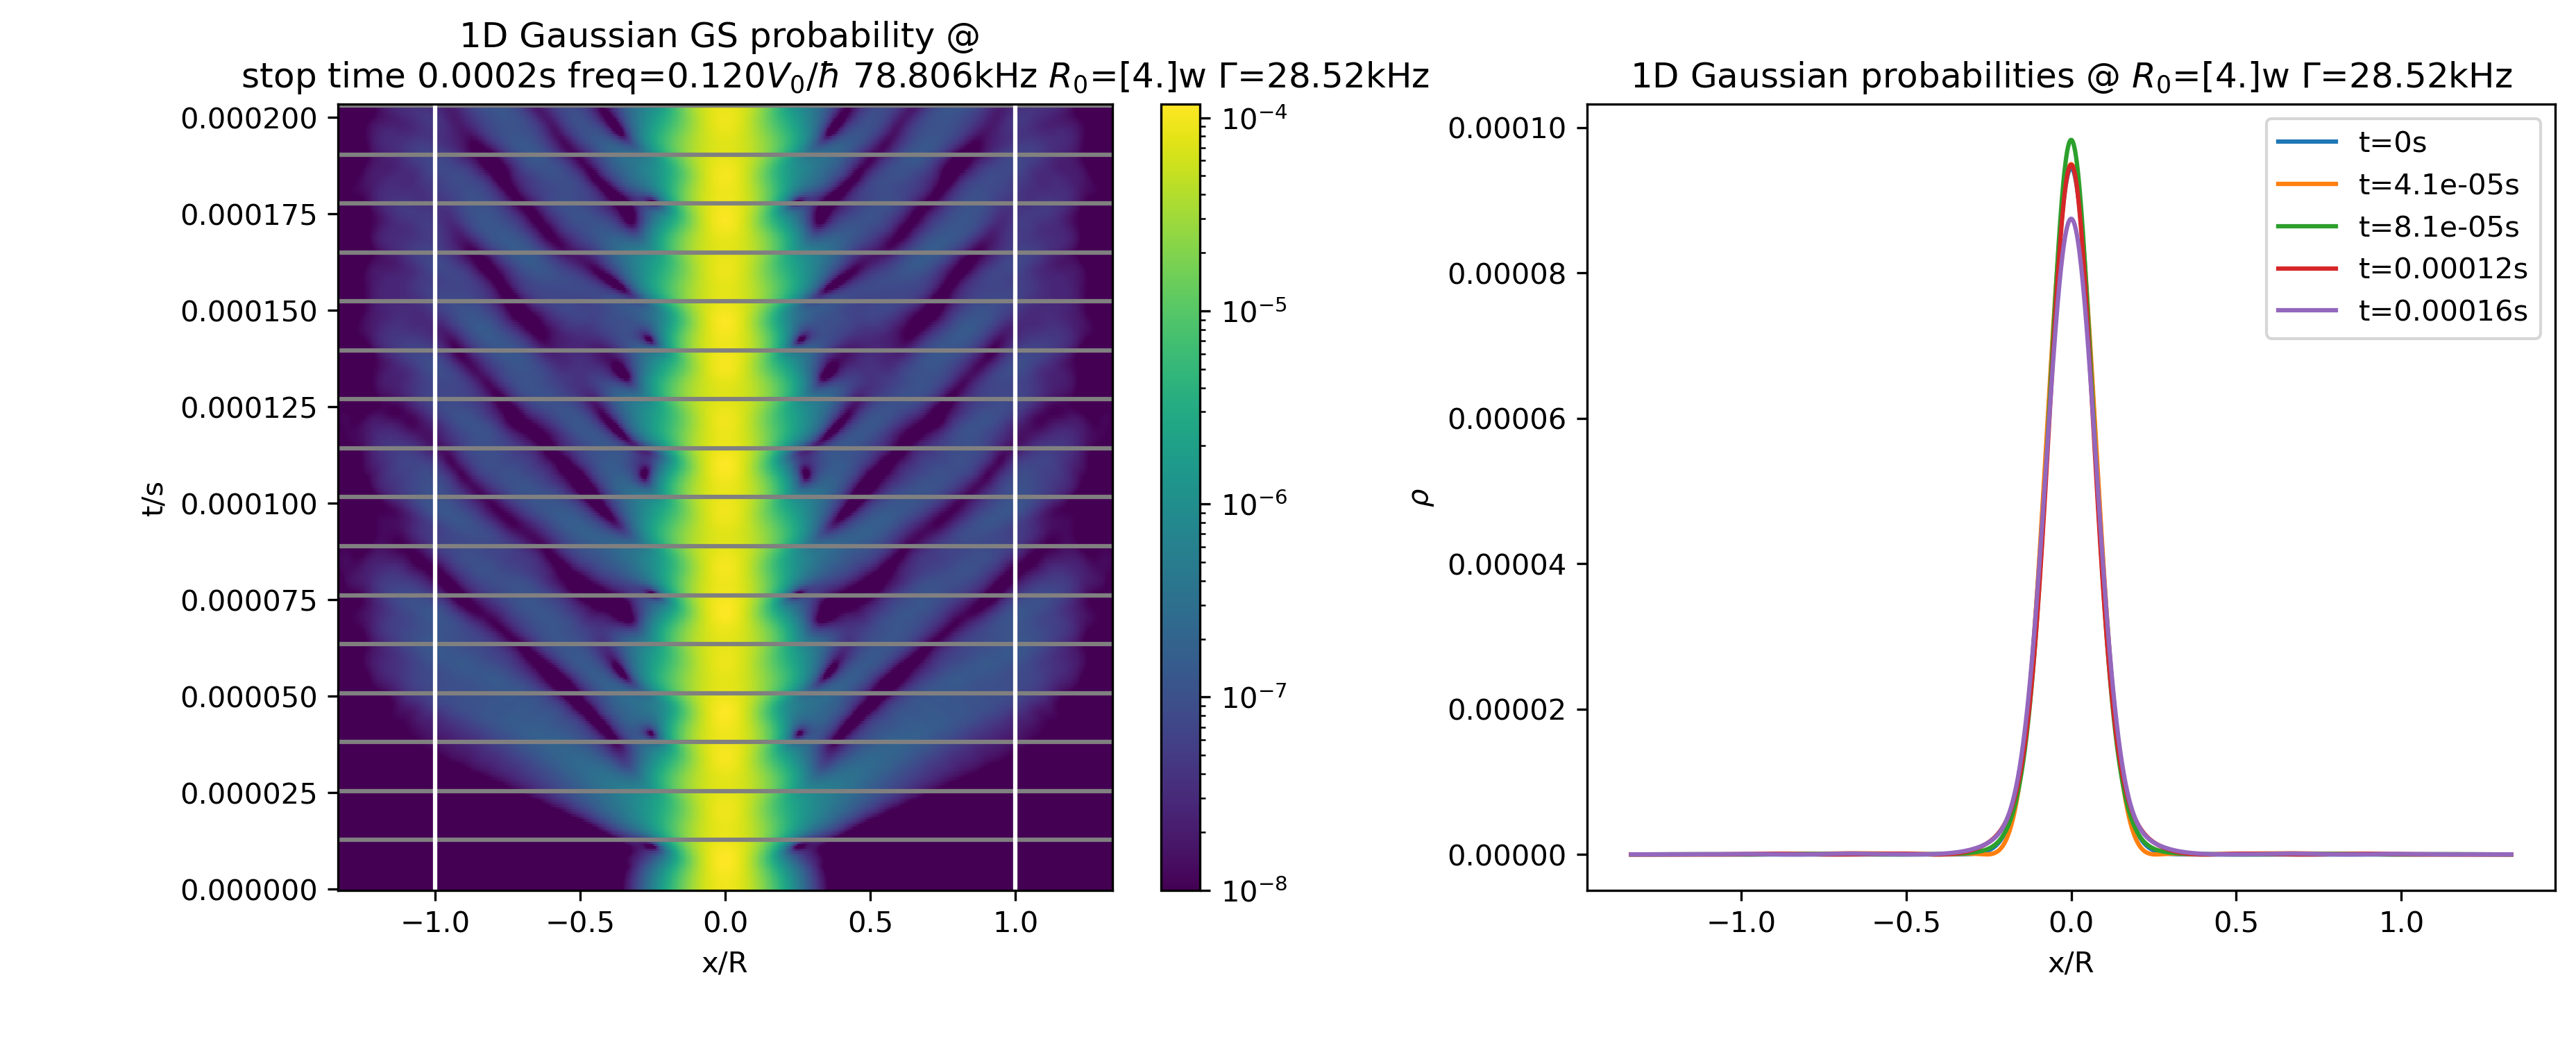

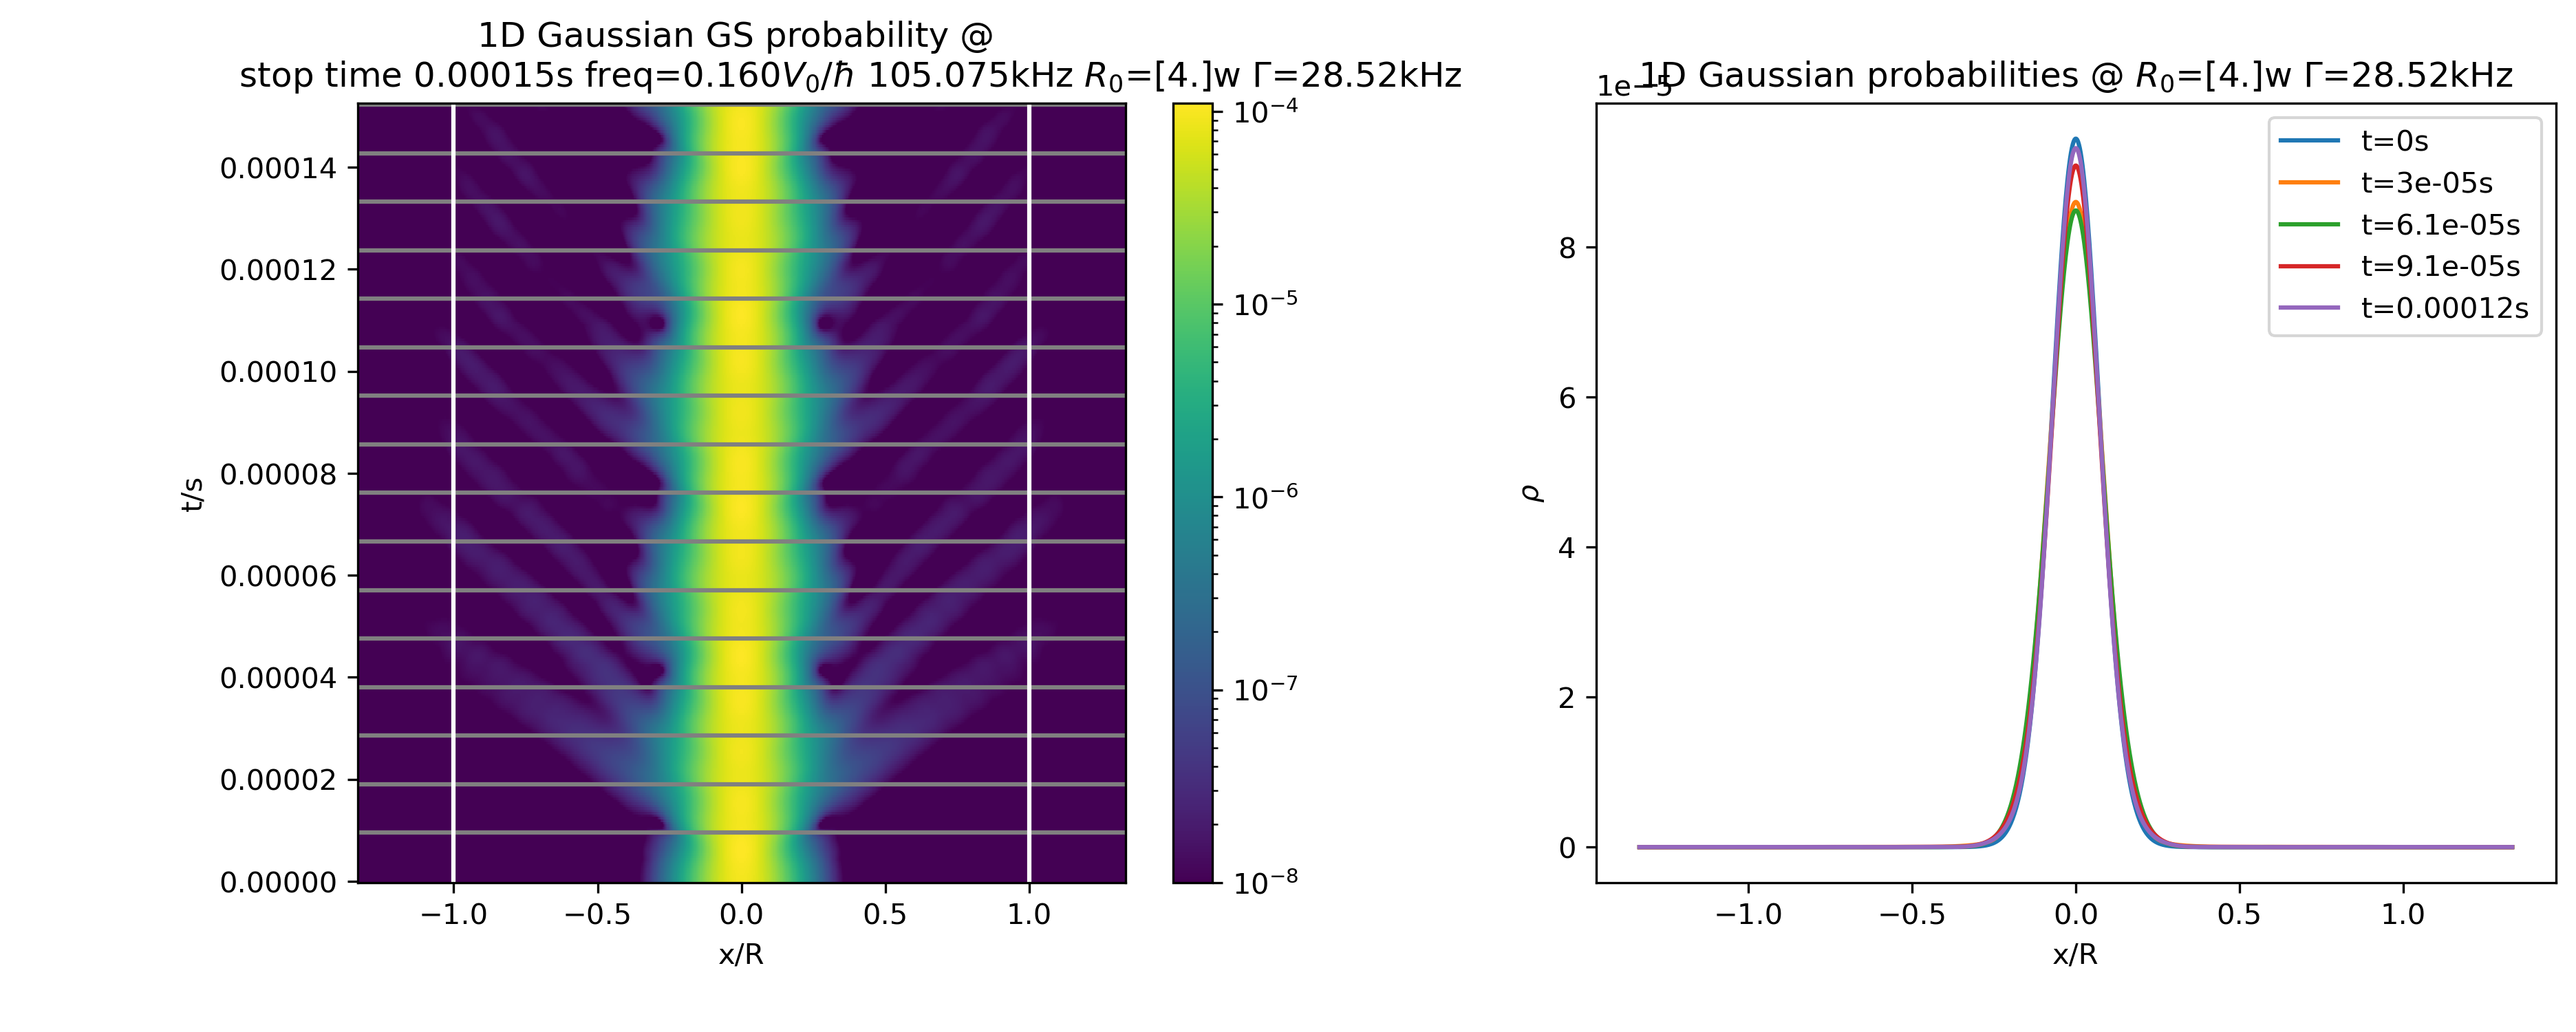

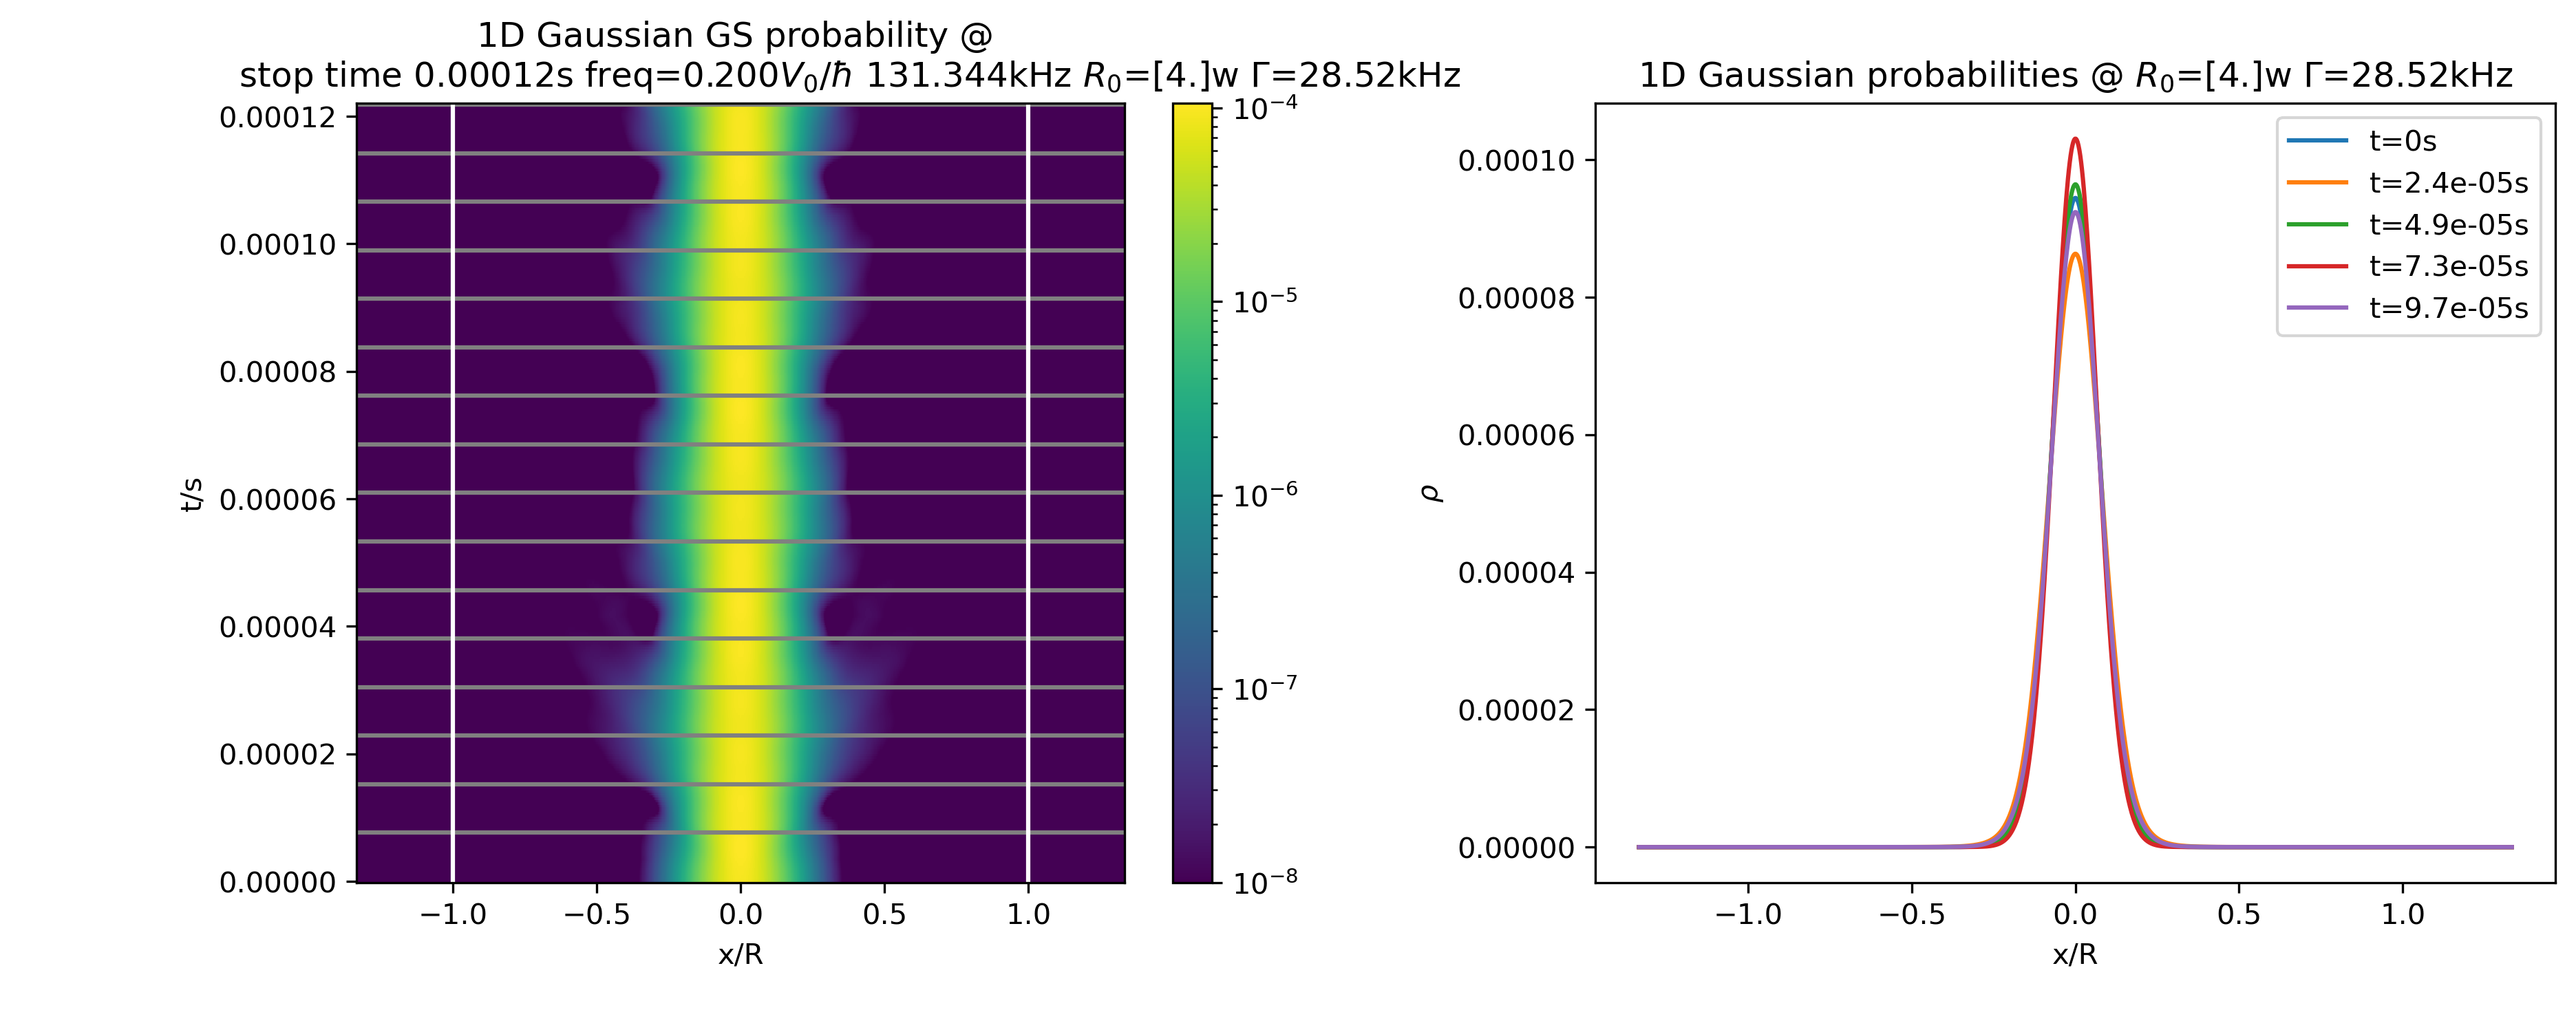

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from DVR_exe import *
import os
from plot_dynamics import *

d = 1
N = 18
N_list = range(N, N + 1, 2)
R = 3 * np.array([w, w, 2.4 * w])
L = w
R = R + L
freq_list = np.arange(.12, .2, .04)
st = 16 / (freq_list * V0_SI)
sn = 10.0
Gamma = VI0 / 2
Gamma = 0
DVR_exe(
    N,
    R,
    freq_list=freq_list,
    stop_time_list=st,
    step_no=sn,
    dim=d,
    model='Gaussian',
    auto_t_step=False,
    realtime=True,
    symmetry=True,
    wavefunc=True,
    absorber=True,
    ab_param=(L, Gamma),
)

os.system('mv -f *.h5 ../output')

plot_wavefunction(N_list,
                  R0_list=[R for i in range(len(N_list))],
                  freq_list=freq_list,
                  stop_time_list=st,
                  step_no=sn,
                  length=1,
                  symmetry=True,
                  dim=d,
                  realtime=True,
                  absorber=True,
                  ab_param=(L, Gamma),
                  cvg='N')

## Check 1D GS convergence

The original convergence parameter was for T+V, hut for T+V/2 there might be swome difference.

DVR: dx=[0.5]w is set.
DVR: n=[6] is set.
DVR: R0=[3.]w is set.
param_set: trap parameter V0=104.52kHz w=1000m
dx= [0.5 0.  0. ]w
R= [3. 0. 0.]w
n= [6 0 0]
H_op: n=[6] dx=[0.5]w p=[0] Gaussian sparse diagonalization is enabled. Lowest -1 states are to be calculated.
H_op: n=[6] dx=[0.5]w p=[0] Gaussian operator constructed.
H_solver: diagonalize sparse hermitian matrix.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.00s.
H_solver: eigenstates memory usage: 0.00 MiB.
DVR: dx=[0.42857143]w is set.
DVR: n=[7] is set.
DVR: R0=[3.]w is set.
param_set: trap parameter V0=104.52kHz w=1000m
dx= [0.42857143 0.         0.        ]w
R= [3. 0. 0.]w
n= [7 0 0]
H_op: n=[7] dx=[0.42857143]w p=[0] Gaussian sparse diagonalization is enabled. Lowest -1 states are to be calculated.
H_op: n=[7] dx=[0.42857143]w p=[0] Gaussian operator constructed.
H_solver: diagonalize sparse hermitian matrix.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.00s.
H_solver: eigenstates memory usage: 0.00 MiB.
DVR:

Text(0.5, 1.0, 'Energy levels vs N for 1D Gaussian potential, fixing R = [3.]w')

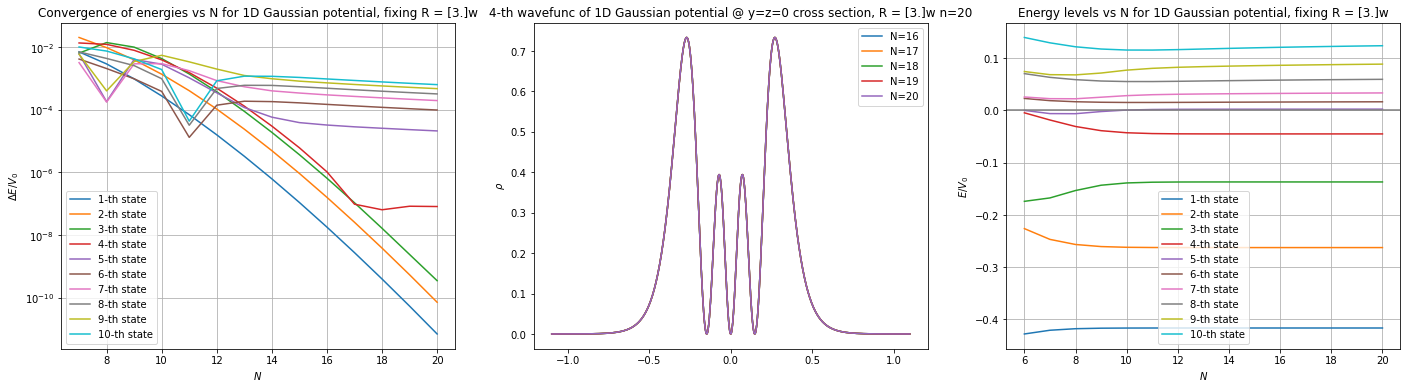

In [1]:
from DVR_full import *
from DVR_cvg import *
import matplotlib.pyplot as plt

R = 3 * np.array([1, 1, 2.4])
dim = 1
Nmax = 20
N_iter = range(6, Nmax + 1, 1)

l = 4
N_arr, dE, E1, x, psi = N_convergence(N_iter, R, avg=1 / 2, dim=dim, level=l)

plot_no = 3
plot_list = range(0, k, 1)
f = plt.figure(figsize=(8 * plot_no, 6))
ax1 = f.add_subplot(1, plot_no, 1)
for i in plot_list:
    ax1.semilogy(N_arr[1:], abs(dE[:, i]), label='{}-th state'.format(i + 1))
ax1.set_xlabel('$N$')
ax1.set_ylabel('$\Delta E/V_0$')
ax1.grid()
ax1.legend(loc='lower left')
ax1.axhline(y=0, color='gray')
ax1.set_title(
    'Convergence of energies vs N for {}D Gaussian potential, fixing R = {}w'.
    format(dim, R[:dim]))

ax2 = f.add_subplot(1, plot_no, 2)
# for i in range(0, k, 2):
#     ax2.plot(x, psi[:, i], label='{}-th state'.format(i + 1))
for i in range(10, len(N_iter), 1):
    N = list(N_iter)[i]
    ax2.plot(x, abs(psi[i][:, l - 1])**2, label='N={}'.format(N))
# ax2.set_xlabel('x/R')
ax2.set_ylabel('$\\rho$')
ax2.legend()
ax2.set_title(
    '{}-th wavefunc of {}D Gaussian potential @ y=z=0 cross section, R = {}w n={}'
    .format(l, dim, R[:dim], Nmax))

ax3 = f.add_subplot(1, plot_no, 3)
for i in plot_list:
    ax3.plot(N_arr, E1[:, i], label='{}-th state'.format(i + 1))
ax3.set_xlabel('$N$')
ax3.set_ylabel('$E/V_0$')
ax3.grid()
ax3.legend()
ax3.axhline(y=0, color='gray')
ax3.set_title(
    'Energy levels vs N for {}D Gaussian potential, fixing R = {}w'.format(
        dim, R[:dim]))
